
# Bitcoin Price Prediction - 3

Group Members:
Ibrahim Ege Oral 29299|
Mustafa Ozan Yaman 28909|
Ömer Can Öztürk 29248|
Deniz Çetin 28896|
 



## Introduction



We will attempt to tackle the problem of trying to predict the price of Bitcoin using the graphical data analysis techniques and machine learning algorithms. The outcome for the project would be to approximate the future prices of bitcoin as close as possible.

First, we will make sure to use clean data meaning there won’t be any incorrect, corrupted, duplicate, or incomplete data in our data set. Depending on the data set’s attributes we will also use proper methods to treat the missing values (if any exists) in the data set to get a much more complete and unbiased analysis of our data set.

After analyzing the given data sets, we will be including 4(corrected here, was different in the proposal) additional new features from additional data sets and visually explain them one by one. 

During the statistical and hypothesis testing phase, we will also use experimental methods to observe relationships with specific factors affecting Bitcoin prices relative to our data set.

After having tested the data, we will compare our datasets with each other to see if there is correlation between them such as conducting statistical tests to check how the volume and close features contribute to opening price of the next day and more.

At the end of our Project, we will have predicted trends of all features (open, high, low, close, adj close, volume) with our machine learning algorithm done by utilizing the steps explained above for the future time span from 09 march 2022(corrected here, was incorrect in proposal) to 09 september 2022.





## Utilized Datasets

<font color="white">
If you are using additional datasets, describe them in detail. Provide the data source (links if possible), number of obervations, data types, display the distributions of various variables and plot figures that helps the reader understand what you are dealing with.
</font>

We are not going to be using additional datasets but the ones we were given: 

- https://www.kaggle.com/datasets/surajjha101/analyzing-and-prediction-of-bitcoin-pricing
- https://www.kaggle.com/prasoonkottarathil/btcinusd

In [ ]:
# installing the required libraries

!pip install reverse_geocoder
!pip install geopy



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 7.3 MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=8896695e9d9a1b9eff615d5112f17d616c4d78c01e74ae069bdfe88275e8a29b
  Stored in directory: /root/.cache/pip/wheels/34/6e/70/5423639428a2cac8ea7eb467214a4254b549b381f306a9c790
Successfully built reverse-geocoder
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# connecting to drive
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive'

Mounted at ./drive


In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import t
import scipy.stats as scs
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
import statistics

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
# extracting the file
filename = "BTC-USD.csv"
df = pd.read_csv(join(path_prefix, filename))
df2 = pd.read_csv(join(path_prefix, filename))

In [ ]:
# describes df (dataframe)
df.describe()
df.head(2800)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2750,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287


In [ ]:
# the shape / rows - columns
df.shape

(2755, 7)

In [ ]:
# showing the data types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# showing we do not have any missing/corrupted data 
# 0 means the percentage of Nan values in the data hence shows whether we have missing data
df.isna().sum() / df.shape[0]

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

## Exploratory Data Analysis

```
-    Visualization of descriptive statistics of the dataset; visualize price trends based on time series and volume.

-	Visualize each feature separately based on time series

-	Example visualizations of aggregated forms based on features (e.g. group the dataset based on open and/or close prices with respect to volumes and compare distributions or centrality metrics of these features for different open/close prices)

-	Analysis of the highest and lowest price of all time with respect to volume

-	Analyzing how high & low prices change with respect to time

-	Comparison of open, close, high and low prices for selected time range and/or volume

-	Introduction of at least four new features from additional datasets and visual explanations of them

-	For both existing and new features, and usage of spatial visualization examples (as much as possible) are expected.

```


###Visualization of descriptive statistics of the dataset; visualize price trends based on time series and volume



In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2.755000e+03
mean,11768.664114,12082.896368,11425.227294,11783.725409,11783.725409,1.489443e+10
std,16405.233671,16841.443821,15910.212812,16413.271203,16413.271203,1.994140e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.777497,612.311005,606.981994,609.804504,609.804504,8.172330e+07
50%,6380.379883,6504.649902,6297.930176,6385.819824,6385.819824,5.262698e+09
75%,10795.780762,11047.681152,10485.476074,10788.915528,10788.915528,2.512467e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


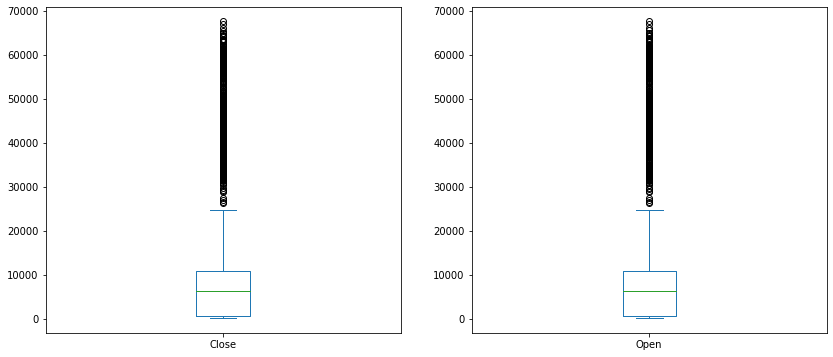

In [ ]:
# distribution plots
# showing the Close and Open features in box plots
fig, ax = plt.subplots(1, 2, figsize=(14,6))

df["Close"].plot(kind="box", ax=ax[0])
df["Open"].plot(kind="box", ax=ax[1])

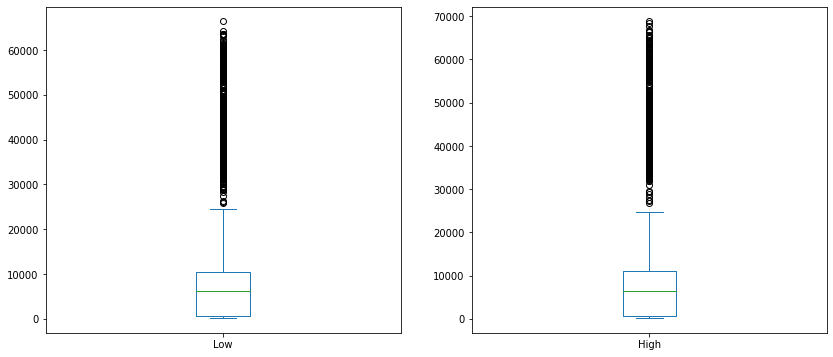

In [ ]:
# distribution plots
# showing the Low and High features in box plots
fig, ax = plt.subplots(1, 2, figsize=(14,6))

df["Low"].plot(kind="box", ax=ax[0])
df["High"].plot(kind="box", ax=ax[1])

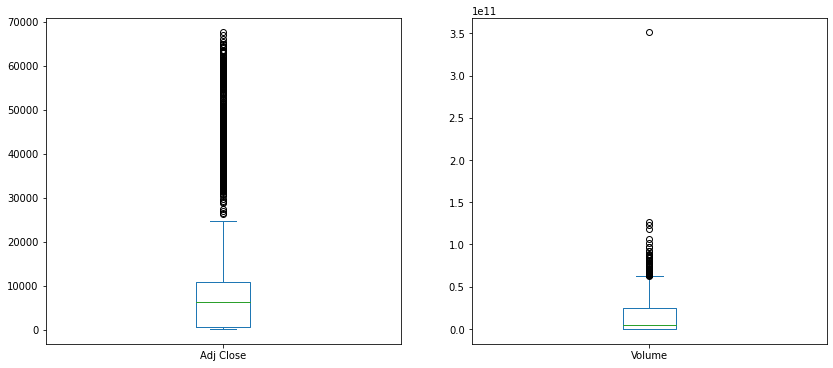

In [ ]:
# distribution plots
# showing the Adj Close and Volume features in box plots
fig, ax = plt.subplots(1, 2, figsize=(14,6))

df["Adj Close"].plot(kind="box", ax=ax[0])
df["Volume"].plot(kind="box", ax=ax[1])

###Visualize each feature separately based on time series


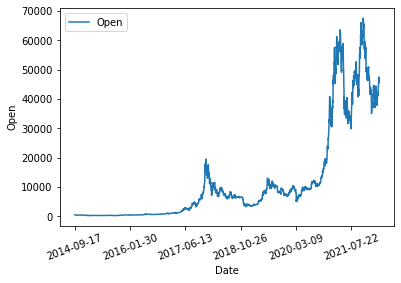

In [ ]:
#Line graph of opening prices with respect to date
df.plot.line("Date","Open",ylabel = "Open", rot = 20)

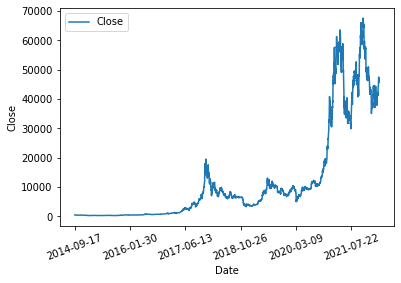

In [ ]:
#Line graph of closing prices with respect to date
df.plot.line("Date","Close",ylabel = "Close",rot = 20)

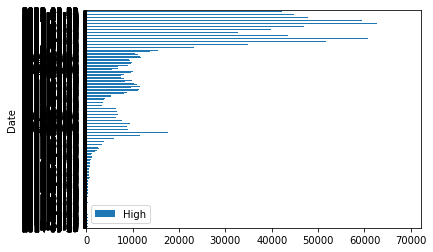

In [ ]:

df.plot.barh("Date", "High", xlabel = "Date", ylabel = "High")

We wanted to show an example of bad data visualisation and the importance of the selection of the right technique for the data in-hand. Since we have approximately 2800 data points the barchart is not a good choice, thus we are not going to be using this visualisation technique. We will now show the same data with one of the right techniques which makes everything much more easy to understand and clear.

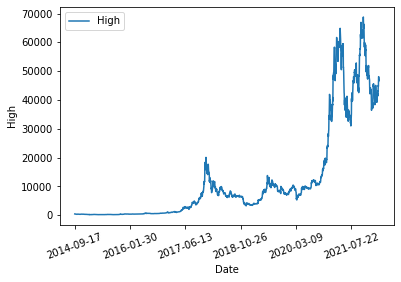

In [ ]:
#Line graph of high prices with respect to date
df.plot.line("Date", "High", xlabel = "Date", ylabel = "High",rot = 20)

As you can see the graph is much more clear and easy to read/interpret with the right visualisation technique.

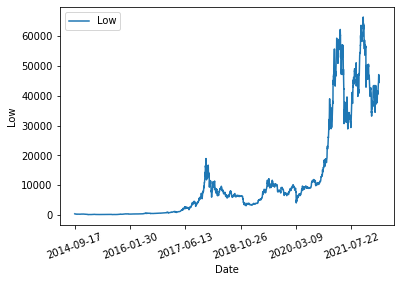

In [ ]:
#Line graph of low prices with respect to date
df.plot.line("Date","Low",ylabel = "Low",rot = 20)

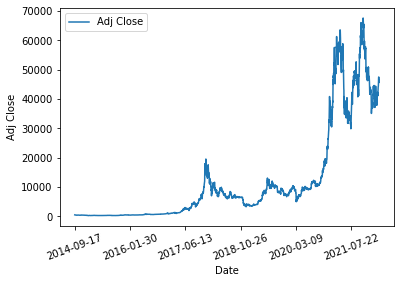

In [ ]:
#Line graph of adjusted closing prices with respect to date
df.plot.line("Date","Adj Close",ylabel = "Adj Close",rot = 20)

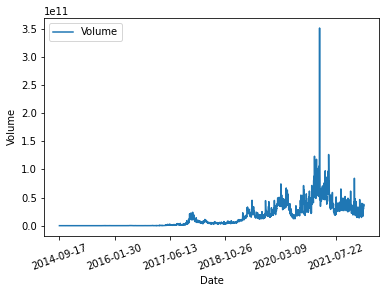

In [ ]:
#Line graph of transactions with respect to date
df.plot.line("Date","Volume",ylabel = "Volume",rot = 20)

###Analysis of the highest and lowest price of all time with respect to volume
There is no correlation between high prices and volume as well as low prices and volume as it can be seen in below graphs but there is a strong correlation between high and low prices with respect to volume.

68789.625 is the highest price with respect to volume
171.509995 is the lowest price with respect to volume


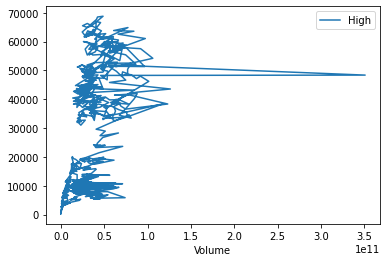

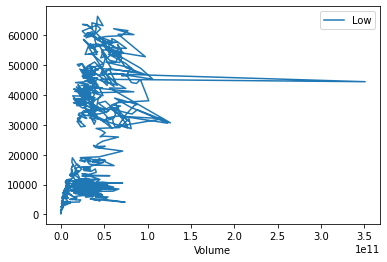

In [ ]:
#finding maximum and minimum prices with respect to volume
df.plot.line("Volume", "High")
maxdata = df.max()
print(maxdata[2], "is the highest price with respect to volume")
df.plot.line("Volume", "Low")
mindata = df.min()
print(mindata[3], "is the lowest price with respect to volume")

###Analyzing how high & low prices change with respect to time
There are fluctuations and sudden drops in the high and low price databut generally we can conclude that there is a trend that shows an increase in the bitcoin prices with respect to time.

From 2014 up until June 13th of 2017, Bitcoin prices show really minor increases with little amount of fluctuation in that 3 year span of time. After that, prices show higher levels of jumps than ever before and these jumps gradually get bigger until the end 2017. With the start 2018, we see suddle drops in the price of Bitcoin which fluctuate less over time. Medium levels of fluctuation and mostly consistent values for Bitcoin price continues until the end of 2020. Within the first quarter of 2021, Bitcoin prices drastically begin to increase, making huge leaps in a really short amount of time. Until the calendars hit July, however, Bitcoin prices also see immense drops in almost 3 months, almost nullfying the effects of the sudden increase at the start of the year. Then another series of sudden and enormous leaps begin to occur in the following months with high level fluctuation still being a factor in the prices and Bitcoin reached its all-time highest price in November. After this another series of sudden dips and drops started happening, gradually decreasing Bitcoin's price. As of 2022, Bitcoin prices continue on a relatively consistent value although there has been certain periods where fluctuations rose, immensely altering Bitcoin's market prices.


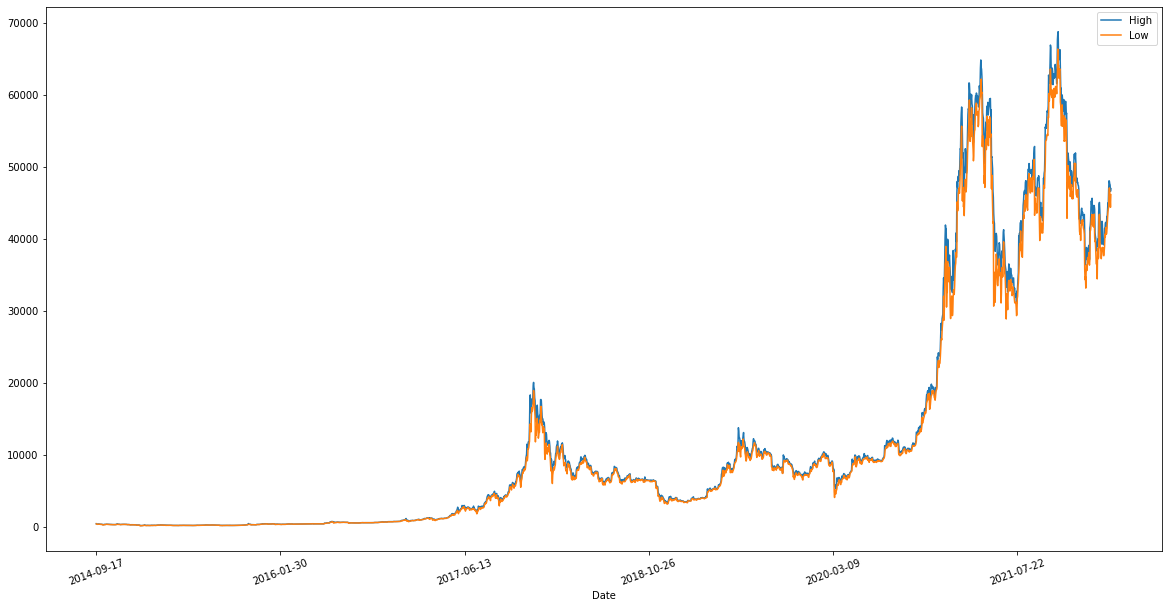

In [ ]:
df.plot.line(x = 'Date', y = ['High', 'Low'], figsize = (20,10), rot = 20)

###Comparison of open, close, high and low prices for selected time range and/or volume
- We are going to be selecting the month with the highest open price of each year and the month with lowest open price of each year and compare them. 
- We are going to be selecting the month with the highest close price of each year and the month with lowest close price of each year and compare them. 
- We are going to be selecting the month with the highest high price of each year and the month with lowest high price of each year and compare them. 
- We are going to be selecting the month with the highest low price of each year and the month with lowest low price of each year and compare them. 

-    Introduction of at least four new features from additional datasets and visual explanations of them

-    For both existing and new features, and usage of spatial visualization examples (as much as possible) are expected.

#### Opening Market Prices

In [ ]:
#dividing the dataframe into smaller dataframes which includes only one year and their corresponding dates in them
df2014 = df[:106]
df2015 = df[106:471]
df2016 = df[471:837]
df2017 = df[837:1202]
df2018 = df[1202:1567]
df2019 = df[1567:1932]
df2020 = df[1932:2298]
df2021 = df[2298:2663]
df2022 = df[2663:]
maxopen = df2014.max()
minopen = df2014.min()
maxopen1 = df2015.max()
minopen1 = df2015.min()
maxopen2 = df2016.max()
minopen2 = df2016.min()
maxopen3 = df2017.max()
minopen3 = df2017.min()
maxopen4 = df2018.max()
minopen4 = df2018.min()
maxopen5 = df2019.max()
minopen5 = df2019.min()
maxopen6 = df2020.max()
minopen6 = df2020.min()
maxopen7 = df2021.max()
minopen7 = df2021.min()
maxopen8 = df2022.max()
minopen8 = df2022.min()
print(maxopen[1], "is the maximum opening price for the year 2014 and", minopen[1], "is the minimum opening price for the year 2014.")
print(maxopen1[1], "is the maximum opening price for the year 2015 and", minopen1[1], "is the minimum opening price for the year 2015.")
print(maxopen2[1], "is the maximum opening price for the year 2016 and", minopen2[1], "is the minimum opening price for the year 2016.")
print(maxopen3[1], "is the maximum opening price for the year 2017 and", minopen3[1], "is the minimum opening price for the year 2017.")
print(maxopen4[1], "is the maximum opening price for the year 2018 and", minopen4[1], "is the minimum opening price for the year 2018.")
print(maxopen5[1], "is the maximum opening price for the year 2019 and", minopen5[1], "is the minimum opening price for the year 2019.")
print(maxopen6[1], "is the maximum opening price for the year 2020 and", minopen6[1], "is the minimum opening price for the year 2020.")
print(maxopen7[1], "is the maximum opening price for the year 2021 and", minopen7[1], "is the minimum opening price for the year 2021.")
print(maxopen8[1], "is the maximum opening price for the year 2022 and", minopen8[1], "is the minimum opening price for the year 2022.")


465.864014 is the maximum opening price for the year 2014 and 310.914001 is the minimum opening price for the year 2014.
465.208008 is the maximum opening price for the year 2015 and 176.897003 is the minimum opening price for the year 2015.
975.125 is the maximum opening price for the year 2016 and 365.072998 is the minimum opening price for the year 2016.
19475.800781 is the maximum opening price for the year 2017 and 775.177979 is the minimum opening price for the year 2017.
17527.300781 is the maximum opening price for the year 2018 and 3236.274658 is the minimum opening price for the year 2018.
13017.125 is the maximum opening price for the year 2019 and 3401.376465 is the minimum opening price for the year 2019.
28841.574219 is the maximum opening price for the year 2020 and 5002.578125 is the minimum opening price for the year 2020.
67549.734375 is the maximum opening price for the year 2021 and 28994.009766 is the minimum opening price for the year 2021.
47680.925781 is the max

In [ ]:
print(maxopen[1] - minopen[1], "is the difference between the maximum and minimum opening prices of 2014")
print(maxopen1[1] - minopen1[1], "is the difference between the maximum and minimum opening prices of 2015")
print(maxopen2[1] - minopen2[1], "is the difference between the maximum and minimum opening prices of 2016")
print(maxopen3[1] - minopen3[1], "is the difference between the maximum and minimum opening prices of 2017")
print(maxopen4[1] - minopen4[1], "is the difference between the maximum and minimum opening prices of 2018")
print(maxopen5[1] - minopen5[1], "is the difference between the maximum and minimum opening prices of 2019")
print(maxopen6[1] - minopen6[1], "is the difference between the maximum and minimum opening prices of 2020")
print(maxopen7[1] - minopen7[1], "is the difference between the maximum and minimum opening prices of 2021")
print(maxopen8[1] - minopen8[1], "is the difference between the maximum and minimum opening prices of 2022")

154.950013 is the difference between the maximum and minimum opening prices of 2014
288.311005 is the difference between the maximum and minimum opening prices of 2015
610.052002 is the difference between the maximum and minimum opening prices of 2016
18700.622802 is the difference between the maximum and minimum opening prices of 2017
14291.026123000001 is the difference between the maximum and minimum opening prices of 2018
9615.748535 is the difference between the maximum and minimum opening prices of 2019
23838.996094 is the difference between the maximum and minimum opening prices of 2020
38555.724609 is the difference between the maximum and minimum opening prices of 2021
12633.566405999998 is the difference between the maximum and minimum opening prices of 2022


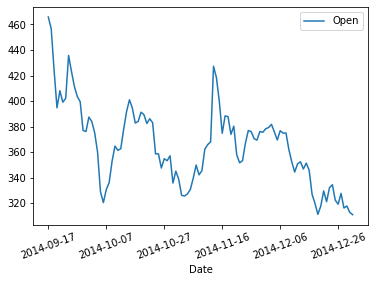

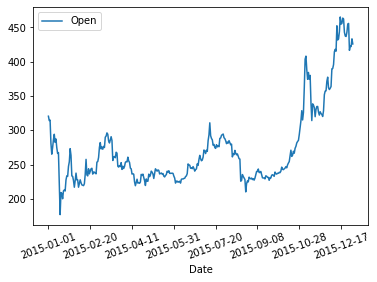

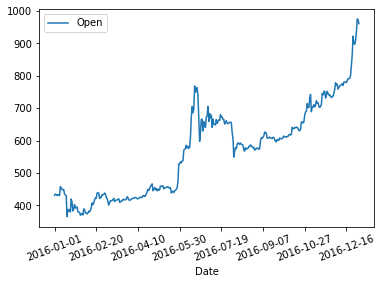

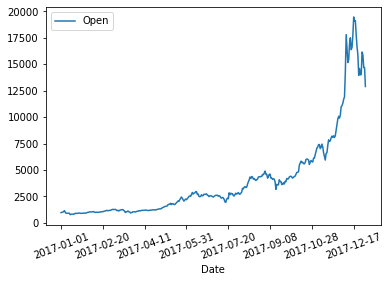

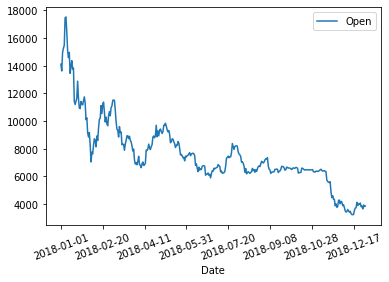

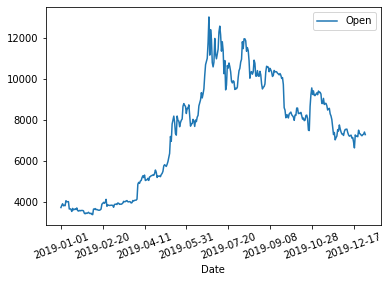

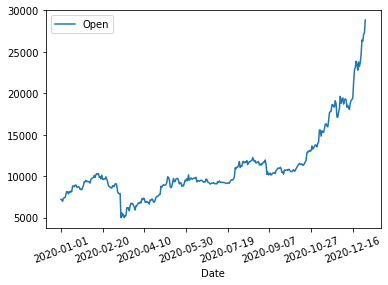

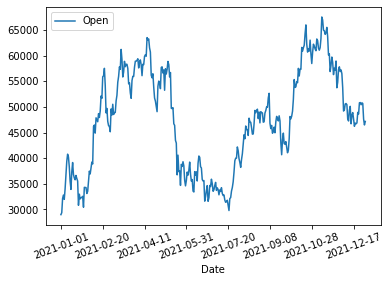

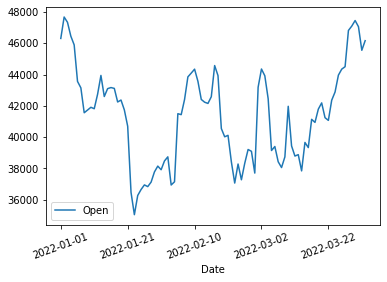

In [ ]:
#plotting each year's market opening price values with respect to date
df2014.plot.line("Date","Open", rot = 20)
df2015.plot.line("Date","Open", rot = 20)
df2016.plot.line("Date","Open", rot = 20)
df2017.plot.line("Date","Open", rot = 20)
df2018.plot.line("Date","Open", rot = 20)
df2019.plot.line("Date","Open", rot = 20)
df2020.plot.line("Date","Open", rot = 20)
df2021.plot.line("Date","Open", rot = 20)
df2022.plot.line("Date","Open", rot = 20)

For the opening prices, except 2015 and 2019 maximum opening price seems to be increased and for the minimum opening prices, except 2015 the same case applies. The difference between the maximum and minimum opening prices for each year seems to be fluctuating but we can clearly see that the best year for the bitcoin opening prices was 2021 since we can see that the maximum opening data is in 2021. Also in 2021, we see the maximum difference between maximum and minimum opening prices. This implies that the market was hard to read and it constantly fluctuated throughout the entirety of 2021. The all-time highest market opening price for Bitcoin is 67549.734375 USD and it is registered in year 2021.

#### Closing Market Prices

In [ ]:
print(maxopen[4], "is the maximum closing price for the year 2014 and", minopen[4], "is the minimum closing price for the year 2014.")
print(maxopen1[4], "is the maximum closing price for the year 2015 and", minopen1[4], "is the minimum closing price for the year 2015.")
print(maxopen2[4], "is the maximum closing price for the year 2016 and", minopen2[4], "is the minimum closing price for the year 2016.")
print(maxopen3[4], "is the maximum closing price for the year 2017 and", minopen3[4], "is the minimum closing price for the year 2017.")
print(maxopen4[4], "is the maximum closing price for the year 2018 and", minopen4[4], "is the minimum closing price for the year 2018.")
print(maxopen5[4], "is the maximum closing price for the year 2019 and", minopen5[4], "is the minimum closing price for the year 2019.")
print(maxopen6[4], "is the maximum closing price for the year 2020 and", minopen6[4], "is the minimum closing price for the year 2020.")
print(maxopen7[4], "is the maximum closing price for the year 2021 and", minopen7[4], "is the minimum closing price for the year 2021.")
print(maxopen8[4], "is the maximum closing price for the year 2022 and", minopen8[4], "is the minimum closing price for the year 2022.")

457.334015 is the maximum closing price for the year 2014 and 310.737 is the minimum closing price for the year 2014.
465.321014 is the maximum closing price for the year 2015 and 178.102997 is the minimum closing price for the year 2015.
975.921021 is the maximum closing price for the year 2016 and 364.330994 is the minimum closing price for the year 2016.
19497.400391 is the maximum closing price for the year 2017 and 777.757019 is the minimum closing price for the year 2017.
17527.0 is the maximum closing price for the year 2018 and 3236.761719 is the minimum closing price for the year 2018.
13016.231445 is the maximum closing price for the year 2019 and 3399.47168 is the minimum closing price for the year 2019.
29001.720703 is the maximum closing price for the year 2020 and 4970.788086 is the minimum closing price for the year 2020.
67566.828125 is the maximum closing price for the year 2021 and 29374.152344 is the minimum closing price for the year 2021.
47686.8125 is the maximum 

In [ ]:
print(maxopen[4] - minopen[4], "is the difference between the maximum and minimum closing prices of 2014")
print(maxopen1[4] - minopen1[4], "is the difference between the maximum and minimum closing prices of 2015")
print(maxopen2[4] - minopen2[4], "is the difference between the maximum and minimum closing prices of 2016")
print(maxopen3[4] - minopen3[4], "is the difference between the maximum and minimum closing prices of 2017")
print(maxopen4[4] - minopen4[4], "is the difference between the maximum and minimum closing prices of 2018")
print(maxopen5[4] - minopen5[4], "is the difference between the maximum and minimum closing prices of 2019")
print(maxopen6[4] - minopen6[4], "is the difference between the maximum and minimum closing prices of 2020")
print(maxopen7[4] - minopen7[4], "is the difference between the maximum and minimum closing prices of 2021")
print(maxopen8[4] - minopen8[4], "is the difference between the maximum and minimum closing prices of 2022")


146.597015 is the difference between the maximum and minimum closing prices of 2014
287.21801700000003 is the difference between the maximum and minimum closing prices of 2015
611.590027 is the difference between the maximum and minimum closing prices of 2016
18719.643372 is the difference between the maximum and minimum closing prices of 2017
14290.238281 is the difference between the maximum and minimum closing prices of 2018
9616.759764999999 is the difference between the maximum and minimum closing prices of 2019
24030.932617 is the difference between the maximum and minimum closing prices of 2020
38192.675781 is the difference between the maximum and minimum closing prices of 2021
12656.5625 is the difference between the maximum and minimum closing prices of 2022


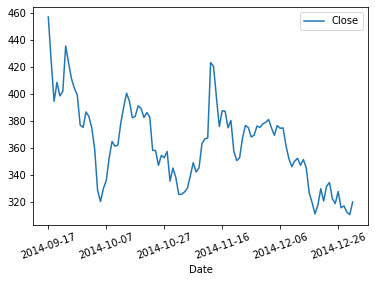

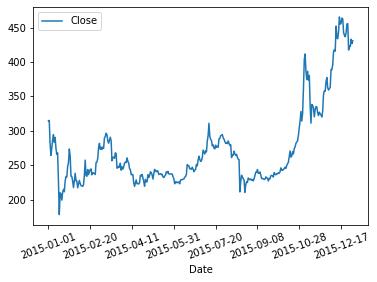

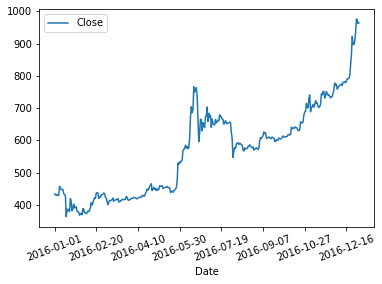

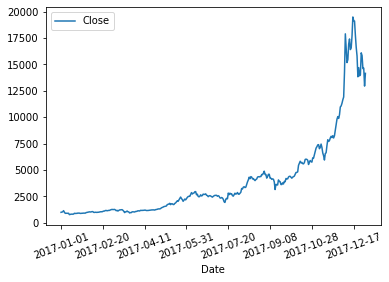

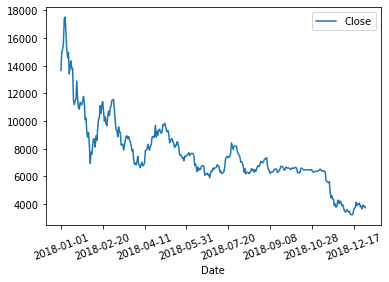

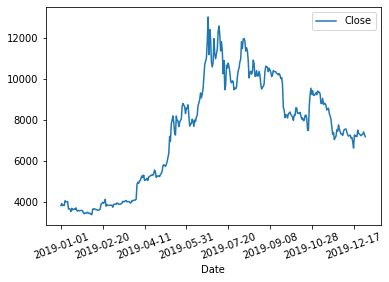

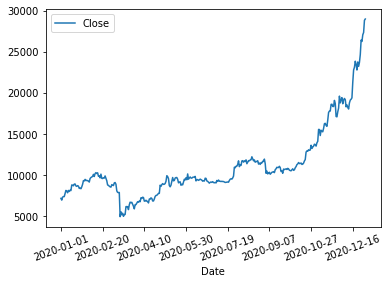

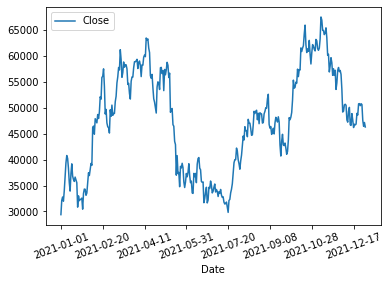

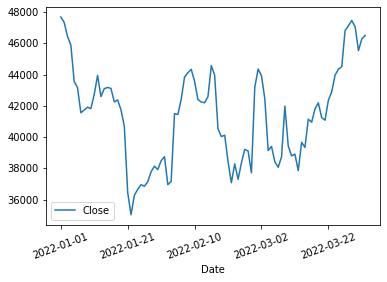

In [ ]:
#plotting each year's market closing price values with respect to date
df2014.plot.line("Date","Close", rot = 20)
df2015.plot.line("Date","Close", rot = 20)
df2016.plot.line("Date","Close", rot = 20)
df2017.plot.line("Date","Close", rot = 20)
df2018.plot.line("Date","Close", rot = 20)
df2019.plot.line("Date","Close", rot = 20)
df2020.plot.line("Date","Close", rot = 20)
df2021.plot.line("Date","Close", rot = 20)
df2022.plot.line("Date","Close", rot = 20)

The closing prices, just as the opening prices, generally show fluctuation among the years with suddle drops and rises in the data. The maximum closing prices peak at 67566.828125 in the year 2021 and the minimum closing prices peak at 29374.152344 again in 2021. As we predicted since the fluctuation in the opening prices was too high in 2021, we also see that the maximum difference between maximum and minimum closing prices is present in this year. One could argue that in 2021, investors could either gain or lose substantial amounts of money due to such fluctuations in a given span of time.

#### Adjusted Closing Market Prices

In [ ]:
print(maxopen[5], "is the maximum adjusted closing price for the year 2014 and", minopen[5], "is the minimum adjusted closing price for the year 2014.")
print(maxopen1[5], "is the maximum adjusted closing price for the year 2015 and", minopen1[5], "is the minimum adjusted closing price for the year 2015.")
print(maxopen2[5], "is the maximum adjusted closing price for the year 2016 and", minopen2[5], "is the minimum adjusted closing price for the year 2016.")
print(maxopen3[5], "is the maximum adjusted closing price for the year 2017 and", minopen3[5], "is the minimum adjusted closing price for the year 2017.")
print(maxopen4[5], "is the maximum adjusted closing price for the year 2018 and", minopen4[5], "is the minimum adjusted closing price for the year 2018.")
print(maxopen5[5], "is the maximum adjusted closing price for the year 2019 and", minopen5[5], "is the minimum adjusted closing price for the year 2019.")
print(maxopen6[5], "is the maximum adjusted closing price for the year 2020 and", minopen6[5], "is the minimum adjusted closing price for the year 2020.")
print(maxopen7[5], "is the maximum adjusted closing price for the year 2021 and", minopen7[5], "is the minimum adjusted closing price for the year 2021.")
print(maxopen8[5], "is the maximum adjusted closing price for the year 2022 and", minopen8[5], "is the minimum adjusted closing price for the year 2022.")

457.334015 is the maximum adjusted closing price for the year 2014 and 310.737 is the minimum adjusted closing price for the year 2014.
465.321014 is the maximum adjusted closing price for the year 2015 and 178.102997 is the minimum adjusted closing price for the year 2015.
975.921021 is the maximum adjusted closing price for the year 2016 and 364.330994 is the minimum adjusted closing price for the year 2016.
19497.400391 is the maximum adjusted closing price for the year 2017 and 777.757019 is the minimum adjusted closing price for the year 2017.
17527.0 is the maximum adjusted closing price for the year 2018 and 3236.761719 is the minimum adjusted closing price for the year 2018.
13016.231445 is the maximum adjusted closing price for the year 2019 and 3399.47168 is the minimum adjusted closing price for the year 2019.
29001.720703 is the maximum adjusted closing price for the year 2020 and 4970.788086 is the minimum adjusted closing price for the year 2020.
67566.828125 is the maxim

In [ ]:
print(maxopen[5] - minopen[5], "is the difference between the maximum and minimum adjusted closing prices of 2014")
print(maxopen1[5] - minopen1[5], "is the difference between the maximum and minimum adjusted closing prices of 2015")
print(maxopen2[5] - minopen2[5], "is the difference between the maximum and minimum adjusted closing prices of 2016")
print(maxopen3[5] - minopen3[5], "is the difference between the maximum and minimum adjusted closing prices of 2017")
print(maxopen4[5] - minopen4[5], "is the difference between the maximum and minimum adjusted closing prices of 2018")
print(maxopen5[5] - minopen5[5], "is the difference between the maximum and minimum adjusted closing prices of 2019")
print(maxopen6[5] - minopen6[5], "is the difference between the maximum and minimum adjusted closing prices of 2020")
print(maxopen7[5] - minopen7[5], "is the difference between the maximum and minimum adjusted closing prices of 2021")
print(maxopen8[5] - minopen8[5], "is the difference between the maximum and minimum adjusted closing prices of 2022")

146.597015 is the difference between the maximum and minimum adjusted closing prices of 2014
287.21801700000003 is the difference between the maximum and minimum adjusted closing prices of 2015
611.590027 is the difference between the maximum and minimum adjusted closing prices of 2016
18719.643372 is the difference between the maximum and minimum adjusted closing prices of 2017
14290.238281 is the difference between the maximum and minimum adjusted closing prices of 2018
9616.759764999999 is the difference between the maximum and minimum adjusted closing prices of 2019
24030.932617 is the difference between the maximum and minimum adjusted closing prices of 2020
38192.675781 is the difference between the maximum and minimum adjusted closing prices of 2021
12656.5625 is the difference between the maximum and minimum adjusted closing prices of 2022


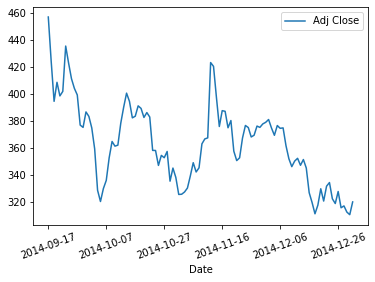

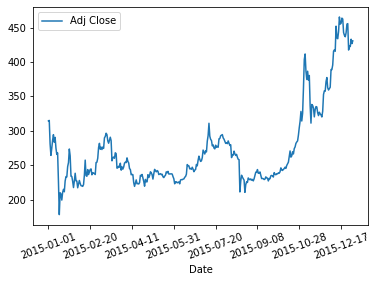

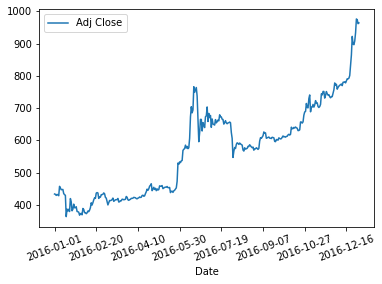

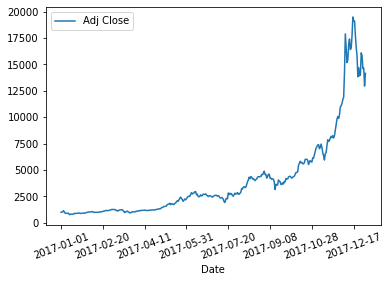

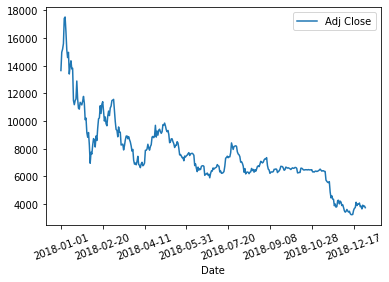

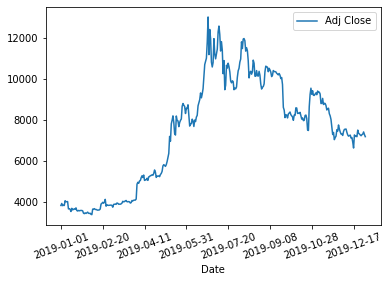

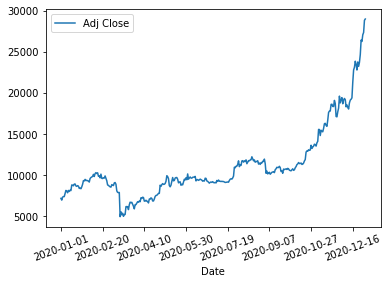

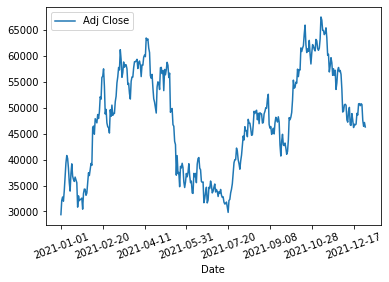

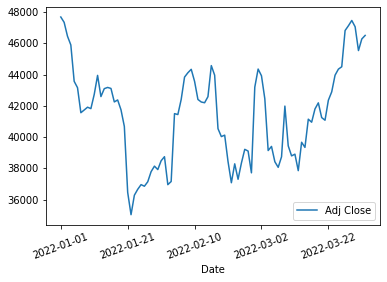

In [ ]:
#plotting each year's adjusted market closing price values with respect to date
df2014.plot.line("Date","Adj Close", rot = 20)
df2015.plot.line("Date","Adj Close", rot = 20)
df2016.plot.line("Date","Adj Close", rot = 20)
df2017.plot.line("Date","Adj Close", rot = 20)
df2018.plot.line("Date","Adj Close", rot = 20)
df2019.plot.line("Date","Adj Close", rot = 20)
df2020.plot.line("Date","Adj Close", rot = 20)
df2021.plot.line("Date","Adj Close", rot = 20)
df2022.plot.line("Date","Adj Close", rot = 20)

By comparing closing and adjusted closing market price graphs, we can see that both values are exactly the same for each year with no exception. Therefore, adjusting has no significant impact on closing market prices.

#### High Market Prices

In [ ]:
print(maxopen[2], "is the maximum high price for the year 2014 and", minopen[2], "is the minimum high price for the year 2014.")
print(maxopen1[2], "is the maximum high price for the year 2015 and", minopen1[2], "is the minimum high price for the year 2015.")
print(maxopen2[2], "is the maximum high price for the year 2016 and", minopen2[2], "is the minimum high price for the year 2016.")
print(maxopen3[2], "is the maximum high price for the year 2017 and", minopen3[2], "is the minimum high price for the year 2017.")
print(maxopen4[2], "is the maximum high price for the year 2018 and", minopen4[2], "is the minimum high price for the year 2018.")
print(maxopen5[2], "is the maximum high price for the year 2019 and", minopen5[2], "is the minimum high price for the year 2019.")
print(maxopen6[2], "is the maximum high price for the year 2020 and", minopen6[2], "is the minimum high price for the year 2020.")
print(maxopen7[2], "is the maximum high price for the year 2021 and", minopen7[2], "is the minimum high price for the year 2021.")
print(maxopen8[2], "is the maximum high price for the year 2022 and", minopen8[2], "is the minimum high price for the year 2022.")

468.174011 is the maximum high price for the year 2014 and 314.80899 is the minimum high price for the year 2014.
495.562012 is the maximum high price for the year 2015 and 211.731003 is the minimum high price for the year 2015.
979.396973 is the maximum high price for the year 2016 and 374.950012 is the minimum high price for the year 2016.
20089.0 is the maximum high price for the year 2017 and 823.307007 is the minimum high price for the year 2017.
17712.400391 is the maximum high price for the year 2018 and 3275.37793 is the minimum high price for the year 2018.
13796.489258 is the maximum high price for the year 2019 and 3427.945557 is the minimum high price for the year 2019.
29244.876953 is the maximum high price for the year 2020 and 5331.833984 is the minimum high price for the year 2020.
68789.625 is the maximum high price for the year 2021 and 29600.626953 is the minimum high price for the year 2021.
48086.835938 is the maximum high price for the year 2022 and 36433.3125 is 

In [ ]:
print(maxopen[2] - minopen[2], "is the difference between the maximum and minimum high prices of 2014")
print(maxopen1[2] - minopen1[2], "is the difference between the maximum and minimum high prices of 2015")
print(maxopen2[2] - minopen2[2], "is the difference between the maximum and minimum high prices of 2016")
print(maxopen3[2] - minopen3[2], "is the difference between the maximum and minimum high prices of 2017")
print(maxopen4[2] - minopen4[2], "is the difference between the maximum and minimum high prices of 2018")
print(maxopen5[2] - minopen5[2], "is the difference between the maximum and minimum high prices of 2019")
print(maxopen6[2] - minopen6[2], "is the difference between the maximum and minimum high prices of 2020")
print(maxopen7[2] - minopen7[2], "is the difference between the maximum and minimum high prices of 2021")
print(maxopen8[2] - minopen8[2], "is the difference between the maximum and minimum high prices of 2022")

153.365021 is the difference between the maximum and minimum high prices of 2014
283.831009 is the difference between the maximum and minimum high prices of 2015
604.446961 is the difference between the maximum and minimum high prices of 2016
19265.692993 is the difference between the maximum and minimum high prices of 2017
14437.022460999999 is the difference between the maximum and minimum high prices of 2018
10368.543700999999 is the difference between the maximum and minimum high prices of 2019
23913.042969 is the difference between the maximum and minimum high prices of 2020
39188.998047 is the difference between the maximum and minimum high prices of 2021
11653.523437999997 is the difference between the maximum and minimum high prices of 2022


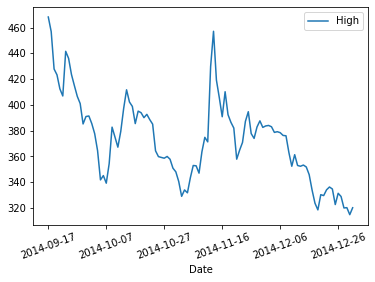

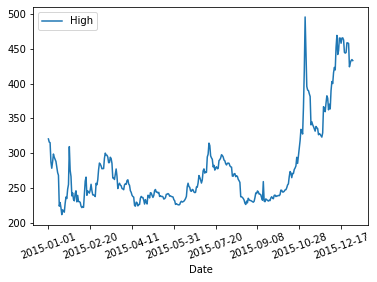

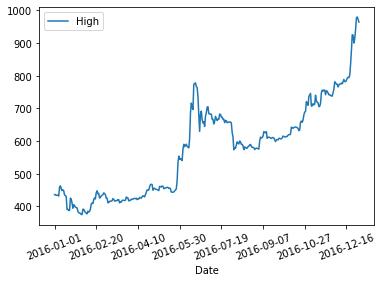

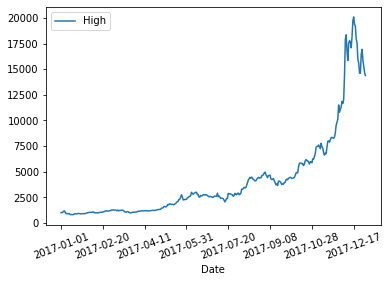

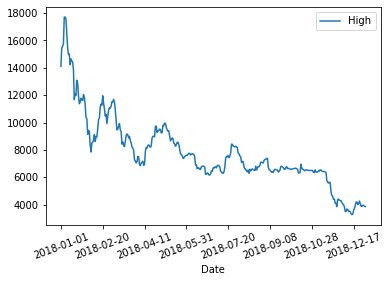

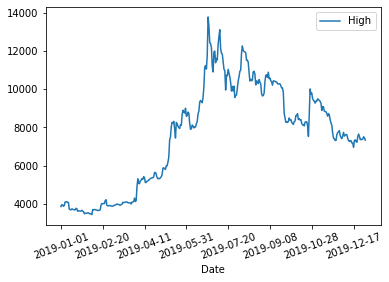

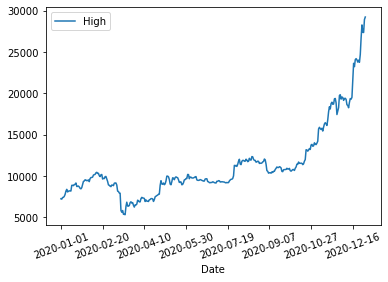

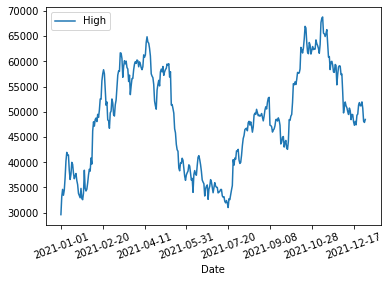

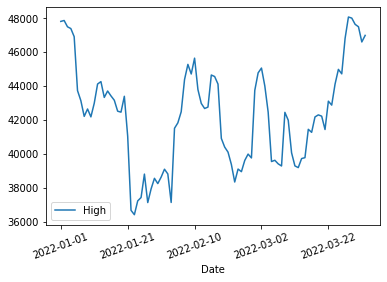

In [ ]:
#plotting each year's high price values with respect to date
df2014.plot.line("Date","High", rot = 20)
df2015.plot.line("Date","High", rot = 20)
df2016.plot.line("Date","High", rot = 20)
df2017.plot.line("Date","High", rot = 20)
df2018.plot.line("Date","High", rot = 20)
df2019.plot.line("Date","High", rot = 20)
df2020.plot.line("Date","High", rot = 20)
df2021.plot.line("Date","High", rot = 20)
df2022.plot.line("Date","High", rot = 20)

The maximum price tag the Bitcoin has ever seen in this 9-year span of dataframe, is 68789.625 and it occured in the year 2021. 

  In 2014, there has been a decreasing trend in Bitcoin prices between September and until the end of October. In the last quarter of the year, a massive leap in the prices occured in November of 2014 and after that, the prices again have gradually decreased to round up the year.

  In 2015, until the month of October, the prices show high level of fluctuation throughout the first 10 months. Near the end of October, Bitcoin prices see another enormous jump in price value from approximately 325 USD to 495.562012 USD. After a few days, it falls back to almost its old price prior to the jump and fluctuatingly increased to end the year. (but not reaching 495.562012 USD again.)

  In 2016, the first half of the year, Bitcoin prices see mild changes in price and mostly are stable. In May, bitcoin prices have a %20 percent increase in value. At the start of June, Bitcoin prices again see a massive jump in price and after a few days, it again decreases down. In the second half of the year, prices start to gradually increase with mild fluctuations in some months. Bitcoin in 2016 peaks at 979.396973 USD, almost doubling the maximum price of 2015.

  In 2017, Bitcoin prices show an increasing trend with little to no fluctuation throughout the year, Prices peak at an immense and marvelous number of 20089.0 USD in the end of October, almost 20 times higher than 2016's peak price tag. After this enormous value, Bitcoin prices mildly decrease with intermediate levels of fluctuation to finish off a strong and rather great and consistent year for Bitcoin.

  In 2018, opposite to the year prior, the prices follow a decreasing trend with high fluctuations at the first half of the year which also decreases as the year progresses. Although it is important to note that there have been suddle leaps in price of Bitcoin in February, April and July of 2018. Bitcoin prices peaked at 17712.400391 USD, almost %10 less than the maximum price value of 2017.

  In 2019, Bitcoin prices start the year with mild changes in the first quarter of the year. In the month of April, prices start to leap to higher values and this trend continues during the summer as well, peaking at June with 13796.489258 USD, almost %25 less than 2018. After this peak, prices start to fall off with highly fluctuating trends, occasionally jumping in August and October, to round up a rather bad year for Bitcoin and its owners.

  In 2020, there is an increase in prices at the start of the year until mid February, then there is a sudden and grand drop in prices approximately at March. After this sudden drop, we can see that there is a general trend of increasing prices for the rest of the year. 2020 can be interpreted as the come up year  for bitcoin since it has a massive jump and increase from around 10-12 thousand to almost 30 thousand. Bitcoin prices in 2020 peaked at 29244.876953 USD, higher than two times of the last year's maximum price.

  In 2021, Bitcoin sees its highest fluctuating, unstable and inconsistent values to date. There is no stable month and the prices show leaps or dips in various months. Although the graph shows a generally increasing trend for prices, In the month of April, Bitcoin suffers from a big drop in value. It does not seem to recover from this dip until the end of June, where the Bitcoin prices start to gradually increase again with high levels of fluctuation. In November, Bitcoin reaches its peak not only in 2021, but also in its entire history at 68789.625 USD, an enormous price and a big achievement for the cryptocurrency's legacy. After it reaches its peak, prices start to fall down with suddle leaps occasionally occuring in the last quarter of the year, but still, Bitcoin finishes the year off strong, with a much higher price than 2020's maximum price.

  In 2022, Bitcoin price follows a stable value as of April, we see the highest price in March which is equivalent to 48086.835938 USD. It still shows a %25 decrease in price from the All Time High price in November 2021. Over the past few months, Bitcoin followed a breathtaking fluctuation, making the market unstable and increasing the fear of people according to the Fear & Greed Index. The data is not finished yet, but based on the data we gathered, it looks like the Bitcoin price will be going around the $30000 - $45000 price range throughout the year. Lastly, the graph of 2022's Bitcoin prices tend to be deceiving since a change of 6000 USD is shown to be much more drastic although 6000 USD is a relatively minor change.


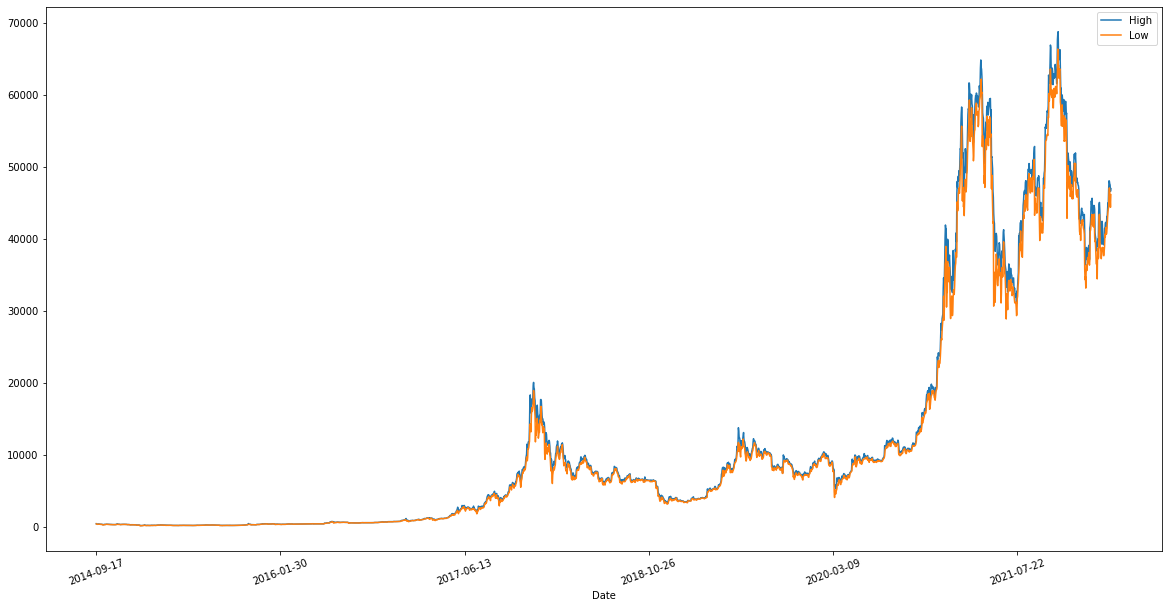

In [ ]:
df.plot.line(x = 'Date', y = ['High', 'Low'], figsize = (20,10), rot = 20)

In reference to the section named "Analyzing how high & low prices change with respect to time", this graph clearly shows that there is a strong correlation and similarity between high and low prices and their behaviours. Therefore, we can infer that all of our interpretations on high price values of each year in our data set is also applicable to the low price values as well.

#### Low Market Prices

In [ ]:
print(maxopen[3], "is the maximum low price for the year 2014 and", minopen[3], "is the minimum low price for the year 2014.")
print(maxopen1[3], "is the maximum low price for the year 2015 and", minopen1[3], "is the minimum low price for the year 2015.")
print(maxopen2[3], "is the maximum low price for the year 2016 and", minopen2[3], "is the minimum low price for the year 2016.")
print(maxopen3[3], "is the maximum low price for the year 2017 and", minopen3[3], "is the minimum low price for the year 2017.")
print(maxopen4[3], "is the maximum low price for the year 2018 and", minopen4[3], "is the minimum low price for the year 2018.")
print(maxopen5[3], "is the maximum low price for the year 2019 and", minopen5[3], "is the minimum low price for the year 2019.")
print(maxopen6[3], "is the maximum low price for the year 2020 and", minopen6[3], "is the minimum low price for the year 2020.")
print(maxopen7[3], "is the maximum low price for the year 2021 and", minopen7[3], "is the minimum low price for the year 2021.")
print(maxopen8[3], "is the maximum low price for the year 2022 and", minopen8[3], "is the minimum low price for the year 2022.")

452.421997 is the maximum low price for the year 2014 and 289.29599 is the minimum low price for the year 2014.
456.765015 is the maximum low price for the year 2015 and 171.509995 is the minimum low price for the year 2015.
954.502991 is the maximum low price for the year 2016 and 354.914001 is the minimum low price for the year 2016.
18974.099609 is the maximum low price for the year 2017 and 755.755981 is the minimum low price for the year 2017.
16764.599609 is the maximum low price for the year 2018 and 3191.303467 is the minimum low price for the year 2018.
12233.261719 is the maximum low price for the year 2019 and 3391.023682 is the minimum low price for the year 2019.
28201.992188 is the maximum low price for the year 2020 and 4106.980957 is the minimum low price for the year 2020.
66382.0625 is the maximum low price for the year 2021 and 28722.755859 is the minimum low price for the year 2021.
47100.4375 is the maximum low price for the year 2022 and 33184.058594 is the minimu

In [ ]:
print(maxopen[3] - minopen[3], "is the difference between the maximum and minimum low prices of 2014")
print(maxopen1[3] - minopen1[3], "is the difference between the maximum and minimum low prices of 2015")
print(maxopen2[3] - minopen2[3], "is the difference between the maximum and minimum low prices of 2016")
print(maxopen3[3] - minopen3[3], "is the difference between the maximum and minimum low prices of 2017")
print(maxopen4[3] - minopen4[3], "is the difference between the maximum and minimum low prices of 2018")
print(maxopen5[3] - minopen5[3], "is the difference between the maximum and minimum low prices of 2019")
print(maxopen6[3] - minopen6[3], "is the difference between the maximum and minimum low prices of 2020")
print(maxopen7[3] - minopen7[3], "is the difference between the maximum and minimum low prices of 2021")
print(maxopen8[3] - minopen8[3], "is the difference between the maximum and minimum low prices of 2022")

163.12600699999996 is the difference between the maximum and minimum low prices of 2014
285.25502 is the difference between the maximum and minimum low prices of 2015
599.58899 is the difference between the maximum and minimum low prices of 2016
18218.343628000002 is the difference between the maximum and minimum low prices of 2017
13573.296142000001 is the difference between the maximum and minimum low prices of 2018
8842.238037 is the difference between the maximum and minimum low prices of 2019
24095.011231 is the difference between the maximum and minimum low prices of 2020
37659.306641 is the difference between the maximum and minimum low prices of 2021
13916.378905999998 is the difference between the maximum and minimum low prices of 2022


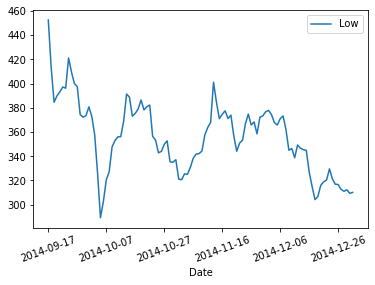

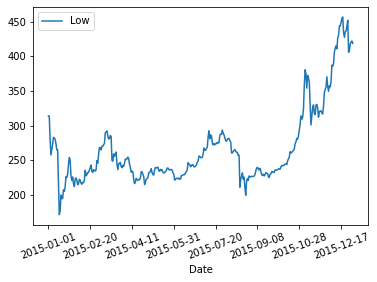

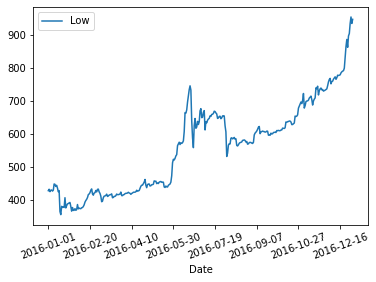

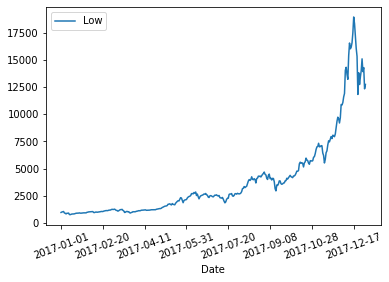

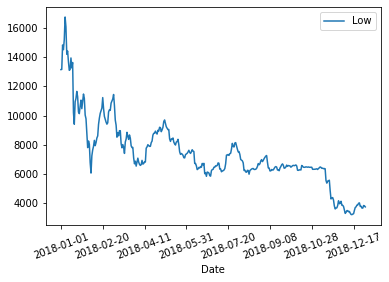

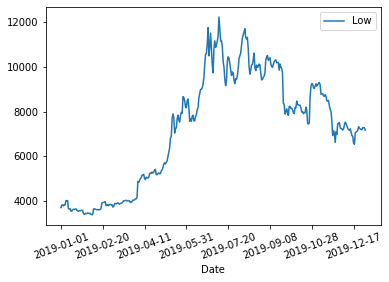

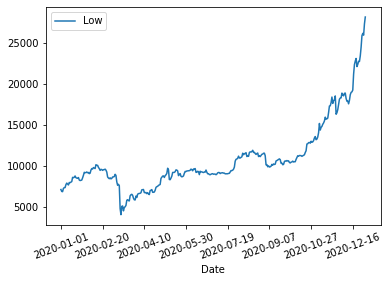

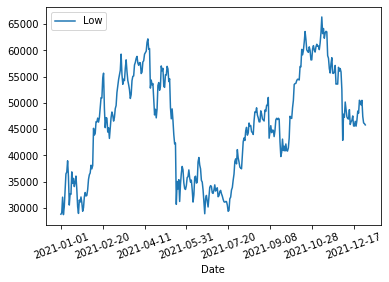

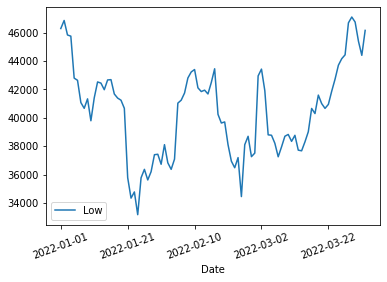

In [ ]:
#plotting each year's high price values with respect to date
df2014.plot.line("Date","Low", rot = 20)
df2015.plot.line("Date","Low", rot = 20)
df2016.plot.line("Date","Low", rot = 20)
df2017.plot.line("Date","Low", rot = 20)
df2018.plot.line("Date","Low", rot = 20)
df2019.plot.line("Date","Low", rot = 20)
df2020.plot.line("Date","Low", rot = 20)
df2021.plot.line("Date","Low", rot = 20)
df2022.plot.line("Date","Low", rot = 20)

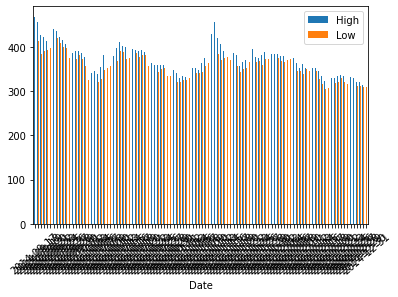

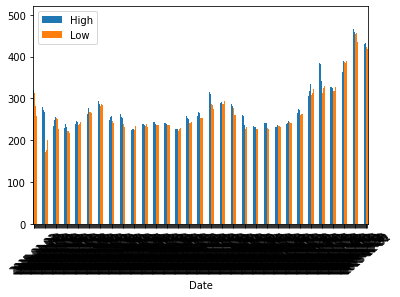

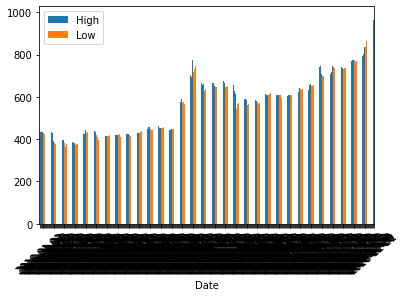

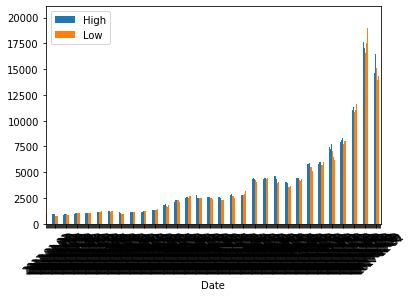

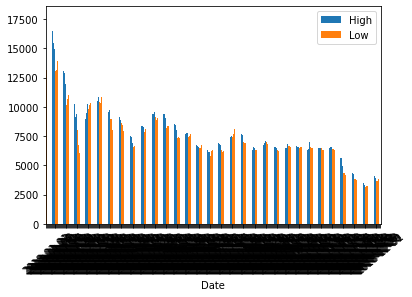

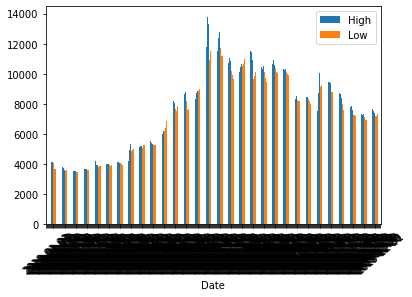

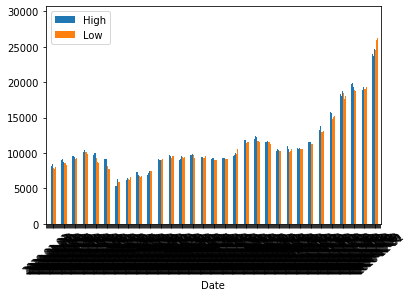

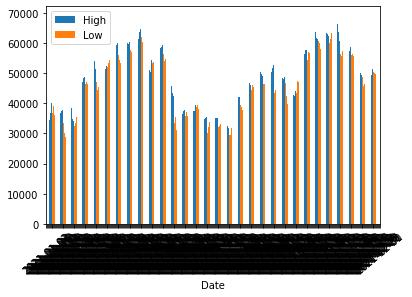

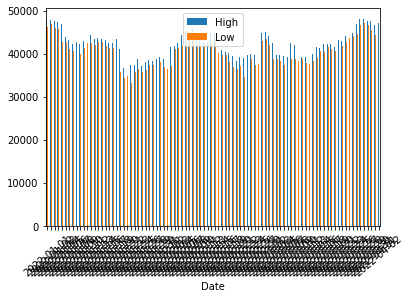

In [ ]:
df2014.plot.bar(x = 'Date', y = ['High', 'Low'], rot = 40)
df2015.plot.bar(x = 'Date', y = ['High', 'Low'], rot = 40)
df2016.plot.bar(x = 'Date', y = ['High', 'Low'], rot = 40)
df2017.plot.bar(x = 'Date', y = ['High', 'Low'], rot = 40)
df2018.plot.bar(x = 'Date', y = ['High', 'Low'], rot = 40)
df2019.plot.bar(x = 'Date', y = ['High', 'Low'], rot = 40)
df2020.plot.bar(x = 'Date', y = ['High', 'Low'], rot = 40)
df2021.plot.bar(x = 'Date', y = ['High', 'Low'], rot = 40)
df2022.plot.bar(x = 'Date', y = ['High', 'Low'], rot = 40)

We can see it here as well that the bar chart is not a viable choice for the visualization of such data since there are so many datapoints in it to cover, the date values are completely unreadable. The most optimal visualisation method for such datasets would be to use a line graph.

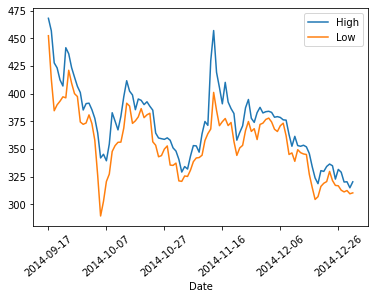

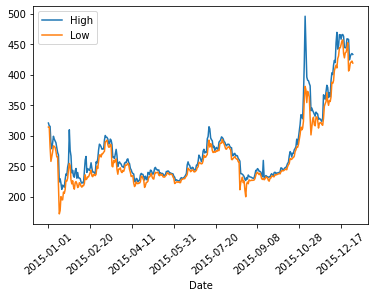

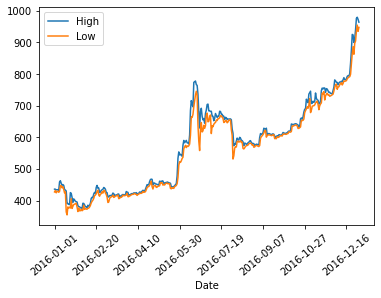

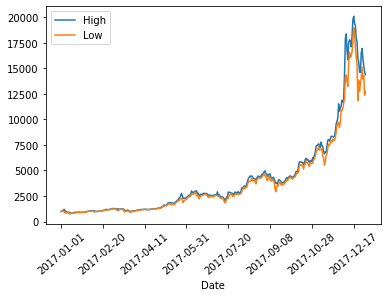

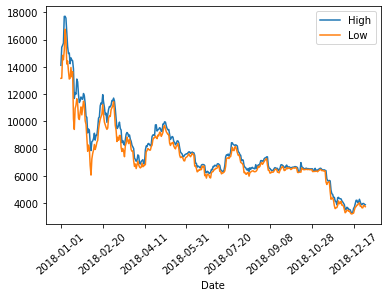

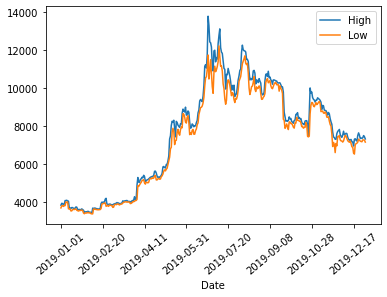

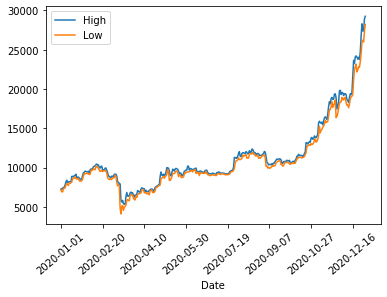

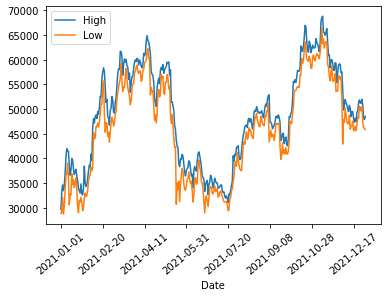

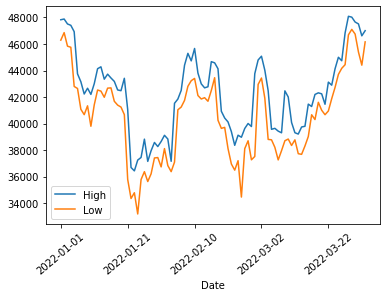

In [ ]:
#plotting each year's high and low price values with respect to date for comparison
df2014.plot.line(x = 'Date', y = ['High', 'Low'], rot = 40)
df2015.plot.line(x = 'Date', y = ['High', 'Low'], rot = 40)
df2016.plot.line(x = 'Date', y = ['High', 'Low'], rot = 40)
df2017.plot.line(x = 'Date', y = ['High', 'Low'], rot = 40)
df2018.plot.line(x = 'Date', y = ['High', 'Low'], rot = 40)
df2019.plot.line(x = 'Date', y = ['High', 'Low'], rot = 40)
df2020.plot.line(x = 'Date', y = ['High', 'Low'], rot = 40)
df2021.plot.line(x = 'Date', y = ['High', 'Low'], rot = 40)
df2022.plot.line(x = 'Date', y = ['High', 'Low'], rot = 40)

From these line graphs, unlike bar charts, we can now see the correlation between high and low prices much more clearly and this allows us to interpret the data much easily and more accurately.

###Introduction of at least four new features from additional datasets and visual explanations of them

- We will be adding 4 extra features to our dataframe project which are:
  - Daily market price fluctuation (closing-opening prices)
  - Daily expected average price of Bitcoin ((high+low prices)/2)
  - The difference between adjusted and normal closing prices (Adj Close- Close)
  - Daily change in price of Bitcoin per transaction ((closing-opening prices)/volume)


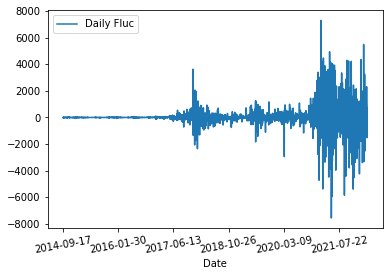

In [ ]:
#Daily market price fluctuation
df['Daily Fluc'] = df['Close'] - df['Open']
df.plot.line("Date","Daily Fluc", rot = 10)

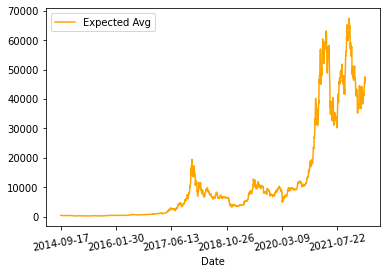

In [ ]:
#Daily expected average price of Bitcoin
df['Expected Avg'] = (df['High'] + df['Low'])/2
df.plot.line("Date","Expected Avg", color='Orange', rot = 10)

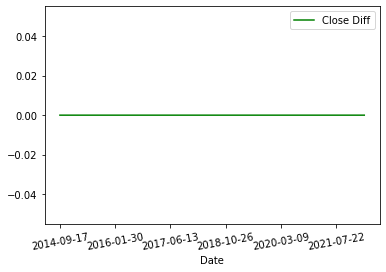

In [ ]:
#The difference between adjusted and normal closing prices
df['Close Diff'] = df['Adj Close'] - df['Close']
df.plot.line("Date","Close Diff", color = "Green", rot = 10)

From this new variable "Close Diff" and its graph, we can say that different factors like dividends, stock splits, new stock offerings etc. had no effect on the closing price of Bitcoin throughout our dataset. Therefore, we can infer that the closing price values in this dataset does not need to be adjusted with tools like dividend and split multipliers to make it more accurate.

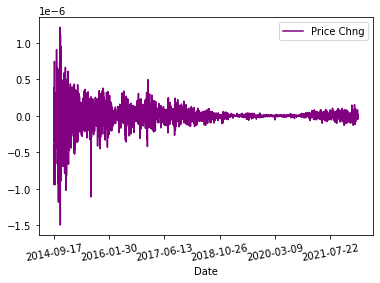

In [ ]:
#Daily change in price of Bitcoin per transaction
df['Price Chng'] = df['Daily Fluc']/df['Volume']
df.plot.line("Date", "Price Chng", color = "Purple", rot = 10)

In [ ]:
# describes df after the addition of new features(dataframe)
df.describe()
df.head(2800)

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Fluc,Expected Avg,Close Diff,Price Chng
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,-8.529999,460.298004,0.0,-4.050947e-07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-32.419983,434.981994,0.0,-9.401675e-07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-29.307007,406.183502,0.0,-7.728702e-07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,14.230988,406.589493,0.0,3.860444e-07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-9.263977,402.803497,0.0,-3.485306e-07
...,...,...,...,...,...,...,...,...,...,...,...
2750,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069,365.292969,47561.363282,0.0,1.163462e-08
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962,-394.234375,47200.679688,0.0,-1.343956e-08
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106,-1523.472657,46451.283204,0.0,-4.571228e-08
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287,727.480468,45509.691407,0.0,1.906263e-08


## Statistical & Hypothesis Testing

<font color="white">
In the future, we are going to be conducting satistical and hypothesis testings. We will also be using experimental methods to observe relationships between specific factors affecting bitcoin prices relative to our dataset. In some cases, if we encounter a situation where the bitcoin prices might be substantially influenced by a certain incident we eill be creating blocks for values during the incident and before/after the incident so that our dataset values will not be generalized and will be more precise. After having tested the data, we will compare our datasets to see if there is correlation between them such as conducting statistical tests to check how the volume and close features contribute to opening price of the next day and more. Since our hypothesis includes the correlation of the values in our data sets, we will be able to get the most accurate data to use in the machine learning step of the project. We will be applying machine learning algorithms such as KNN and Linear regression etc. Then, we will be analyzing the results of our tests and algorithms in graphs. When it comes to the machine learning part, first, we will make 
sure to use clean data meaning there won’t be any incorrect, corrupted, duplicate, or incomplete 
data in our data set. At the end of our Project, we will have predicted trends of all features 
(open, high, low, close, adj close, volume) with our machine learning algorithm done by utilizing 
the steps explained above for the future time span from 09 march 2022(corrected here, was incorrect in the proposal) to 09 september 2022.<br>
</font>

In this section of our project, we will be conducting several hypothesises for different features' interactions between them and how they affect each other in our dataset. Apart from only checking features in our database, we will also observe how prices change between months in the same year and how it behaves in the same month for different years.

### Statistical tests to check how (or if) the volume and close features (in both single and combined manner) contributes to opening price of the next day.

  Our first hypothesis is about volume and close features' effects on the opening price of the next day. Starting with only volume feature, our initial null hypothesis is that volume value of a certain day does not affect the opening price of the next day. Our alternative hypothesis is the opposite of our null hypothesis, stating "A high volume rate of a certain day will cause the opening market price of the next day to be high as well". The confidence level we have determined for this hypothesis is %95.

  Our second hypothesis will be on close feature's affect. For this attribute, our null hypothesis is "Closing market price of the day prior greatly influences the opening market price of Bitcoin the very next day". Just like the hypothesises above, our alternative hypothesis says the exact opposite of the null hypothesis: "Closing price does not affect opening price of the next day" and the confidence level is again %95.

Starting with our first hypothesis, to see how two different data attributes compare with each other, we started by creating the line graphs of both of them. Below, you can see the line graph of "Volume" and "Open" attributes respectively.

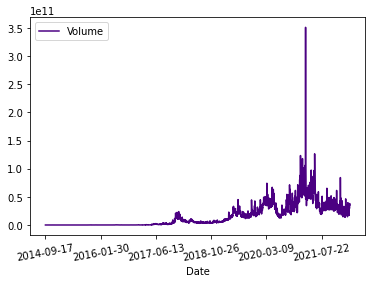

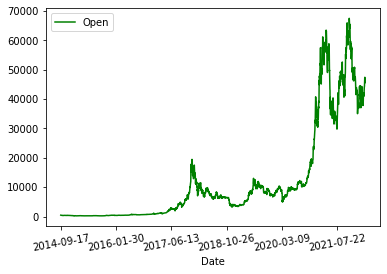

In [ ]:
df.plot.line("Date","Volume", color = "Indigo", rot = 10)
df.plot.line("Date","Open", color = "Green", rot = 10)

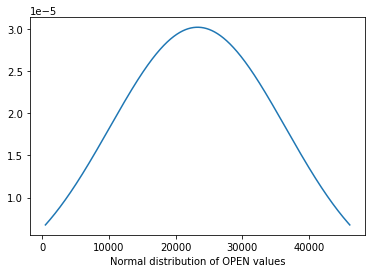

23316.964014005196
13193.110386915178


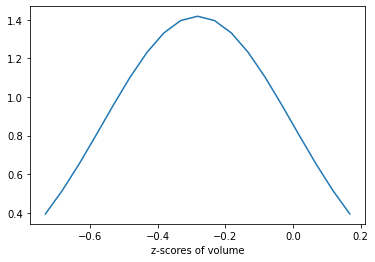


p-value of volume:  7.569901035186776e-265
Reject Null Hypothesis H0


In [ ]:

x_axis = np.arange(df['Open'][0], df['Open'][2754], 0.05)
meanOpen = statistics.mean(x_axis)
sdOpen = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, meanOpen, sdOpen))
plt.xlabel("Normal distribution of OPEN values")
plt.show()
print(meanOpen)
print(sdOpen)

#two samplet-test

rv = t(df=100-2)
sampledf = df.sample(n=2500, random_state=2500)

z = stats.zscore(sampledf['Volume'])

x_axisZ = np.arange(z[0], z[2499], 0.05)
meanVolumeZ = statistics.mean(x_axisZ)
sdVolumeZ = statistics.stdev(x_axisZ)
  


plt.plot(x_axisZ, norm.pdf(x_axisZ, meanVolumeZ, sdVolumeZ))
plt.xlabel("z-scores of volume")
plt.show()


t_stat,pvalue = stats.ttest_ind(sampledf['Volume'],sampledf['Open'])
print('\np-value of volume: ', pvalue)


if pvalue < .05:
   print('Reject Null Hypothesis H0')
elif pvalue >= 0.05:
   print('Fail to reject Null Hypothesis H0')




Since we have obtained a p-value that is really close to zero. Hence, it is smaller than the confidence level that we have set as 0.05. As a result, we reject our null hypothesis. We conclude that by the p-value test, volume feature of a spesific day turns out to be greatly affecting the opening prices of the next day. Therefore, we can say that volume contributes to the opening prices of the next day.

  Now we start to test our second null hypothesis, which states that closing prices do not have an affect on the next day's opening prices. As an alternative to that, we have a hypothesis that says high closing prices result with high opening prices and are directly proportional to each other. Just as in the example above, you can see in the following code block the graphs of CLOSE values and OPEN values respectively.

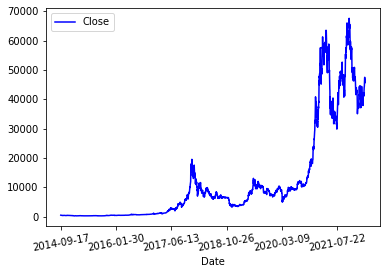

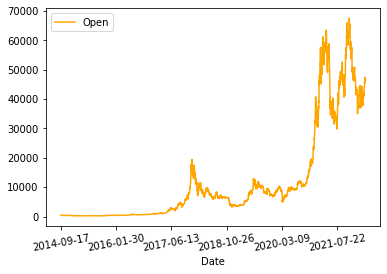

In [ ]:
df.plot.line("Date","Close", color = "Blue", rot = 10)
df.plot.line("Date","Open", color = "Orange", rot = 10)

As the above graphs indicates, we can see a clear correlation between opening prices and closing prices. But we cannot determine anything before doing hypothesis testing and proving it. As we seen in the lecture and as Selim Hoca explicitly stated "correlation does not imply causation".

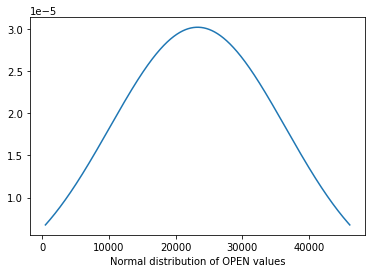

23316.964014005196
13193.110386915178


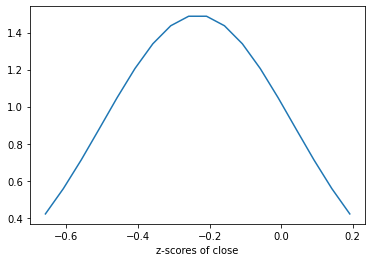


p-value of close:  0.9710744174191461
Fail to reject Null Hypothesis H0


In [ ]:

x_axis = np.arange(df['Open'][0], df['Open'][2754], 0.05)
meanOpen = statistics.mean(x_axis)
sdOpen = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, meanOpen, sdOpen))
plt.xlabel("Normal distribution of OPEN values")
plt.show()
print(meanOpen)
print(sdOpen)

#two samplet-test

rv = t(df=100-2)
sampledf = df.sample(n=2500, random_state=2500)

z = stats.zscore(sampledf['Close'])

x_axisZ = np.arange(z[0], z[2499], 0.05)
meanVolumeZ = statistics.mean(x_axisZ)
sdVolumeZ = statistics.stdev(x_axisZ)
  


plt.plot(x_axisZ, norm.pdf(x_axisZ, meanVolumeZ, sdVolumeZ))
plt.xlabel("z-scores of close")
plt.show()


t_stat,pvalue = stats.ttest_ind(sampledf['Close'],sampledf['Open'])
print('\np-value of close: ', pvalue)


if pvalue < .05:
   print('Reject Null Hypothesis H0')
elif pvalue >= 0.05:
   print('Fail to reject Null Hypothesis H0')




As we can see from the p-value test, p-value derived from the z-score values of close feature is approximated to be 0.97. It is bigger than the confidence level that we have set 0.5, this indicates that there is not enough evidence to side with the alternative hypothesis thus our null hypothesis holds for this relation which was quite surprising for us too since as we explained in the above table there was a clear correlation between the features but again as Selim Hoca said "correlation does not imply causation". Therefore we can conclude that closeing prices do not contribute to the opening prices of next day at all.

Now for the 'Volume' and 'Close' feature there is only one case left which is to combine them and make a statistical test. We will set the null hypothesis as "Volume and closing prices of a certain day does not affect the opening price of the next day". In contrast to this, our alternative hypothesis is "Volume and closing prices of a certain day does affect the opening prices of the next day".

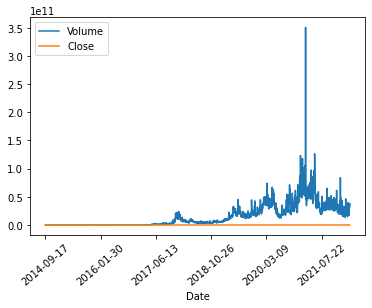

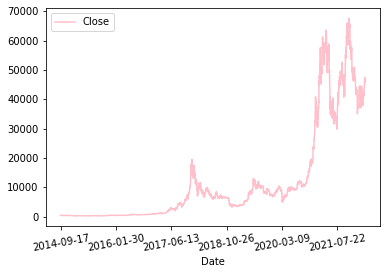

In [ ]:
df.plot.line(x = 'Date', y = ['Volume', 'Close'], rot = 40)
df.plot.line("Date","Close", color = "Pink", rot = 10)

  For our research purposes and ease of use and time, we have copied the dataframe we have obtained above to another dataframe variable, so that we can examine the data by creating new features using the ones we already have without changing the actual dataframe itself. In this example here, we have created a new feature called "CloseDivVol" to check the ratio of closing prices to the volume of transactions and evaluate its p-value to see its significance in affecting the opening prices of the next day.

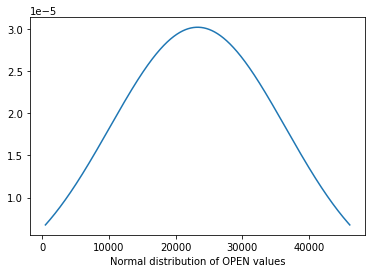

23316.964014005196
13193.110386915178


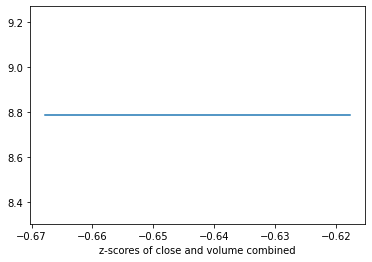


p-value of close and volume combined:  1.1473194446279477e-251
Reject Null Hypothesis H0


In [ ]:


x_axis = np.arange(df['Open'][0], df['Open'][2754], 0.05)
meanOpen = statistics.mean(x_axis)
sdOpen = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, meanOpen, sdOpen))
plt.xlabel("Normal distribution of OPEN values")
plt.show()
print(meanOpen)
print(sdOpen)

#two samplet-test

df2['CloseDivVol'] = df2['Close']/df2['Volume']
df2.describe()
sampledf2 = df2.sample(n=2500, random_state=2500)
z = stats.zscore(sampledf2['CloseDivVol'])

x_axisZ = np.arange(z[1], z[2499], 0.05)
meanVolumeZ = statistics.mean(x_axisZ)
sdVolumeZ = statistics.stdev(x_axisZ)
  


plt.plot(x_axisZ, norm.pdf(x_axisZ, meanVolumeZ, sdVolumeZ))
plt.xlabel("z-scores of close and volume combined")
plt.show()


t_stat,pvalue = stats.ttest_ind(sampledf2['CloseDivVol'],sampledf2['Open'])
print('\np-value of close and volume combined: ', pvalue)


if pvalue < .05:
   print('Reject Null Hypothesis H0')
elif pvalue >= 0.05:
   print('Fail to reject Null Hypothesis H0')



  Since volume and close are combined and since volume's effect on opening prices on its own are higher than closing price's effect on next day's opening prices, volume's effect dominates close's ineffectiveness, resulting with the combination affecting the opening prices of the next day. This can also be derived from the comparison of volume's and close's p-values, where volume has a much smaller p-value than close. Therefore, we can say that with volume's dominance, volume and close attributes as a whole contribute to the new opening price of the next day.

###Statistical tests to check how the close and volume features affects metrics like open prices of next day, and how open price affects high and low prices of that day

  In the upper parts of the project, we have already shown and mentioned the effects of volume and closing prices on the next day's opening prices and to briefly go over the results, volume contributes and affects the opening price of the next day while closing prices do not affect the opening price but as a whole, due to volume's dominance over close, the relations affects the opening price of the next day.

  Now we will additionally show the affects (if any) of open price on high and low prices on that current day.

  Firstly, we will look upon opening prices' effects on high prices only. For this statistical analysis, we will use a null hypothesis as always. Our null hypothesis wil be: "Opening prices of a certain day do not affect the highest price in that day". Alternative hypothesis will be: "If the opening price of the day is high, the highest price of the current day will be higher than yesterday".

  Secondly, to understand both features in the data better, we will plot their graphs as usual. The graphs can be found in the code block below.


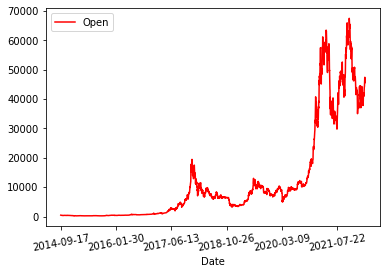

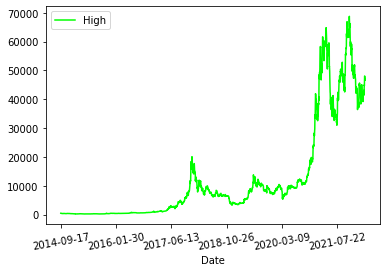

In [ ]:
df.plot.line("Date","Open", color = "Red", rot = 10)
df.plot.line("Date","High", color = "Lime", rot = 10)

  Judging by the graph, as with the closing and opening prices case, instinctively we think that there should be a causation between these two features since there is a high amount of correlation and association between the two graphs. However, we can not be sure without statistical testing as we have seen in our previous cases.

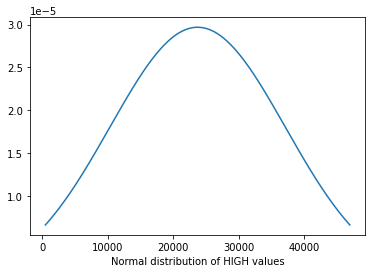

23735.799011005292
13433.591207789477


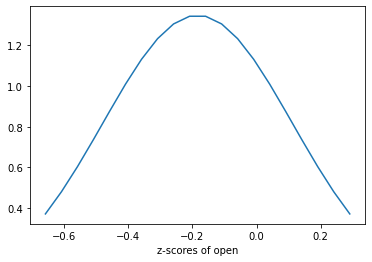


p-value of open:  0.4996121099968981
Fail to reject Null Hypothesis H0


In [ ]:
x_axis = np.arange(df['High'][0], df['High'][2754], 0.05)
meanOpen = statistics.mean(x_axis)
sdOpen = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, meanOpen, sdOpen))
plt.xlabel("Normal distribution of HIGH values")
plt.show()
print(meanOpen)
print(sdOpen)

#two samplet-test

rv = t(df=100-2)
sampledf = df.sample(n=2500, random_state=2500)

z = stats.zscore(sampledf['Open'])

x_axisZ = np.arange(z[0], z[2499], 0.05)
meanVolumeZ = statistics.mean(x_axisZ)
sdVolumeZ = statistics.stdev(x_axisZ)
  


plt.plot(x_axisZ, norm.pdf(x_axisZ, meanVolumeZ, sdVolumeZ))
plt.xlabel("z-scores of open")
plt.show()


t_stat,pvalue = stats.ttest_ind(sampledf['Open'],sampledf['High'])
print('\np-value of open: ', pvalue)


if pvalue < .05:
   print('Reject Null Hypothesis H0')
elif pvalue >= 0.05:
   print('Fail to reject Null Hypothesis H0')

  By the p-value test, we have obtained a p-value much higher 0.05, our confidence interval, which points to the fact that unexpectedly, the opening prices of a day does not greatly affect the highest price of that certain day by any means.

  We will do the same steps for the "Low" feature as well. Our null hypothesis for this feature will be similar to the others as well: "Opening prices of a day do not have an affect on the lowest price of that day". Alternative hypothesis is: "If the opening price of the day is lower than yesterday, lowest price of the day will also be lower than yesterday". You can observe and examine the graphs below.

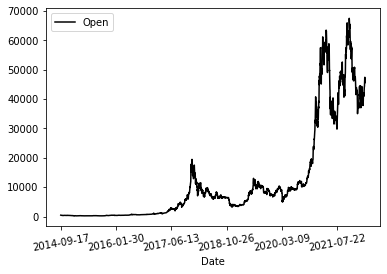

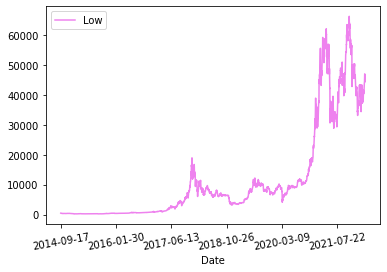

In [ ]:
df.plot.line("Date","Open", color = "Black", rot = 10)
df.plot.line("Date","Low", color = "Violet", rot = 10)

  As expected, we have a similar looking graph for low prices just like high, open and close attributes since opening/closing and highest/lowest prices can not have great changes in a normal day. Again, the correlation and the association is there but we are unsure if we will be able reject our null hypothesis this time.

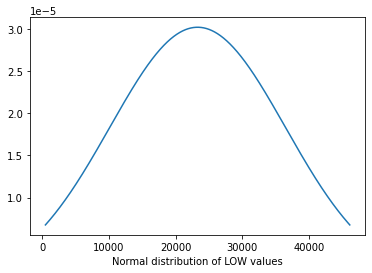

23305.196997005194
13194.07744861607


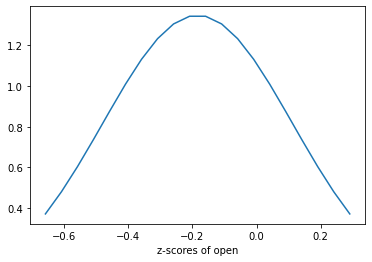


p-value of open:  0.44515839735372575
Fail to reject Null Hypothesis H0


In [ ]:
x_axis = np.arange(df['Low'][0], df['Low'][2754], 0.05)
meanOpen = statistics.mean(x_axis)
sdOpen = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, meanOpen, sdOpen))
plt.xlabel("Normal distribution of LOW values")
plt.show()
print(meanOpen)
print(sdOpen)

#two samplet-test

rv = t(df=100-2)
sampledf = df.sample(n=2500, random_state=2500)

z = stats.zscore(sampledf['Open'])

x_axisZ = np.arange(z[0], z[2499], 0.05)
meanVolumeZ = statistics.mean(x_axisZ)
sdVolumeZ = statistics.stdev(x_axisZ)
  


plt.plot(x_axisZ, norm.pdf(x_axisZ, meanVolumeZ, sdVolumeZ))
plt.xlabel("z-scores of open")
plt.show()


t_stat,pvalue = stats.ttest_ind(sampledf['Open'],sampledf['Low'])
print('\np-value of open: ', pvalue)


if pvalue < .05:
   print('Reject Null Hypothesis H0')
elif pvalue >= 0.05:
   print('Fail to reject Null Hypothesis H0')

Same as the high price case, we can not reject our null hypothesis. This implies that there is no clear evidence that suggests an effect of opening prices of a day on the lowest price of that current day.

###Statistical tests on selected features (e.g. investigate whether there exist significant statistical differences between high and low prices with respect to open and close prices of the same day)

In this step, we will examine and analyse the selected features by doing various alterations and changes on the features like combination, isolation and so forth. For example, in order to be able to get a reasonable statistic, we will combine the opening and closing prices to obtain a new feature which is the average of the opening and closing prices for the respective day as well as we will also combine high and low prices and use the features which has been implemented by us as new features in the dataframe. We will analyse the data through the new features and uncover the correlations and if there is causations between them.

First we will examine and analyse the graphs of the features that we are about to work with. You can see the graphs below.

In [ ]:
#Newly added feature to the datatframe that is used for statistical testing purposes
df2['Daily_Avg'] = (df2['Close']+df2['Open'])/2
df2['HighLowDiff'] = df2['High']-df2['Low']
df2.describe()


,Open,High,Low,Close,Adj Close,Volume,CloseDivVol,Daily_Avg,HighLowDiff
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2.755000e+03,2.755000e+03,2755.000000,2755.000000
mean,11768.664114,12082.896368,11425.227294,11783.725409,11783.725409,1.489443e+10,4.175955e-06,11776.194761,657.669074
std,16405.233671,16841.443821,15910.212812,16413.271203,16413.271203,1.994140e+10,5.777983e-06,16404.468259,1172.982272
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06,7.502628e-08,193.370498,1.028000
25%,609.777497,612.311005,606.981994,609.804504,609.804504,8.172330e+07,6.211373e-07,610.236252,17.683014
50%,6380.379883,6504.649902,6297.930176,6385.819824,6385.819824,5.262698e+09,1.559541e-06,6398.750000,180.030029
75%,10795.780762,11047.681152,10485.476074,10788.915528,10788.915528,2.512467e+10,6.250448e-06,10736.143799,645.409424
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11,6.586210e-05,67260.781250,12864.621094


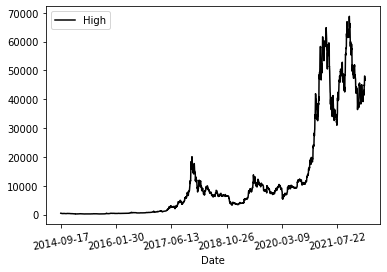

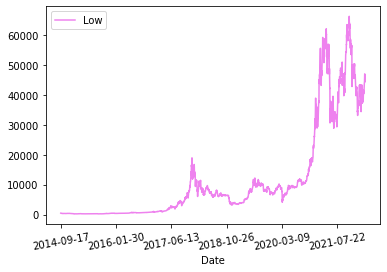

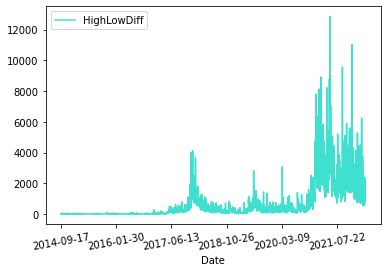

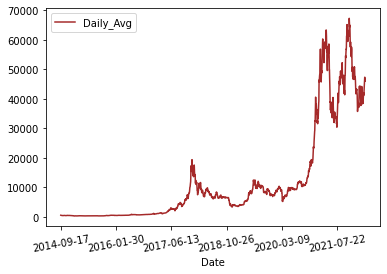

In [ ]:
df.plot.line("Date","High", color = "Black", rot = 10)
df.plot.line("Date","Low", color = "Violet", rot = 10)
df2.plot.line("Date","HighLowDiff", color = "Turquoise", rot = 10)
df2.plot.line("Date","Daily_Avg", color = "Brown", rot = 10)

As expected, the graphs are very similar and look highly correlated. Opening and closing prices' average and the high,low prices for the respective day seems to be related but we cannot be sure before conducting the needed and spesific tests to ensure this. Our null hypothesis will be "The Daily Average value for a spesific day does not have an effect on the difference between the high and low prices of that day". The alternative hypothesis will be "When the daily average values is smaller/larger than usual the difference between the high and low prices of that day will also be smaller/larger".

Here, we used the newly created dataframe to add two new features to use them to evaluate and explore the data in hand. First one, 'HighLowDiff' takes the difference between the high price of the day and the low price of the day for each day in the data, second one is 'Daily_Avg' computes the opening and closing prices' average for each day and we used these two features to obtain a normal distribution and a z-value normal distribution to obtain a p-value so we can figure out whether the null hypothesis or the alternative hypothesis is true.

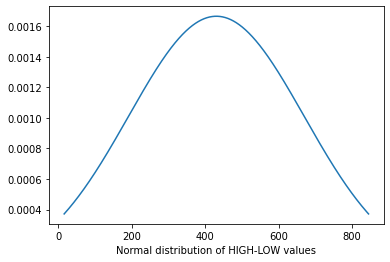

430.57701400000593
239.52097594296058


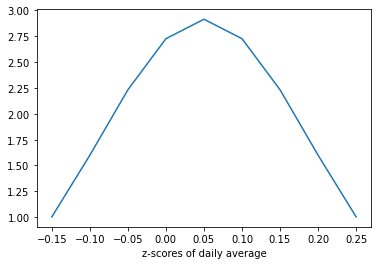


p-value of daily average2:  4.029174514094638e-226
Reject Null Hypothesis H0


In [ ]:
x_axis = np.arange(df2['HighLowDiff'][0], df2['HighLowDiff'][2754], 0.05)
meanHighLow = statistics.mean(x_axis)
sdHighLow = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, meanHighLow, sdHighLow))
plt.xlabel("Normal distribution of HIGH-LOW values")
plt.show()
print(meanHighLow)
print(sdHighLow)

#two samplet-test

sampledf2 = df2.sample(n=2500, random_state=2500)
z = stats.zscore(sampledf2['Daily_Avg'])

x_axisZ = np.arange(z[1], z[2499], 0.05)
meanVolumeZ = statistics.mean(x_axisZ)
sdVolumeZ = statistics.stdev(x_axisZ)
  


plt.plot(x_axisZ, norm.pdf(x_axisZ, meanVolumeZ, sdVolumeZ))
plt.xlabel("z-scores of daily average")
plt.show()


t_stat,pvalue = stats.ttest_ind(sampledf2['Daily_Avg'],sampledf2['HighLowDiff'])
print('\np-value of daily average2: ', pvalue)

if pvalue < .05:
   print('Reject Null Hypothesis H0')
elif pvalue >= 0.05:
   print('Fail to reject Null Hypothesis H0')


As we can see from the calculated p-value which is very smaller than the confidence level that we have set, we have enough evidence to reject the null hypothesis which was stating that opening and closing prices' daily average does not affect the High and Low price differences; so we side with the alternative hypothesis and accept that when the 'Daily_Avg' feature which is the the average of opening and closing prices is smaller/larger than usual, high and low difference 'HighLowDiff' feature is also smaller/larger than usual. 

  Lastly, we will observe if there exist significant differences and variations in Bitcoin price values between different months of the same year and same month of different years. Just as we have done in the previous cases, we will be conducting the p-value test to see if there is correlation between the prices and different time intervals.

  Firstly, we are going to examine the different months of a certain year that we will select accordingly to our research purposes. For this experiment, due to its high fluctuation levels and high prices, we selected to observe the data of the year 2021 as we hope that it will give us the most intriguing results. We will also conduct the analysis of the prices based on the opening prices of each day in a month.

  For this, we will start by creating a sub-dataframe from the year 2021's dataframe and divide it into its months by indices.

In [ ]:
df2021Jan = df2021[0:30]
df2021Feb = df2021[31:58]
df2021Mar = df2021[59:89]
df2021Apr = df2021[90:119]
df2021May = df2021[120:150]
df2021Jun = df2021[151:180]
df2021Jul = df2021[181:211]
df2021Aug = df2021[212:242]
df2021Sep = df2021[243:272]
df2021Oct = df2021[273:303]
df2021Nov = df2021[304:333]
df2021Dec = df2021[334:364]

After creating the sub-dataframes for each month, we will now create our null hypothesis: "There is no significant difference between each month of the same year". The alternative hypothesis to this will be "If the opening price of the month's first day is higher than the average opening price of the prior month's, then that means there is a significant difference between the prices".
The graphs and opening prices of each month in 2021 is in code block below.

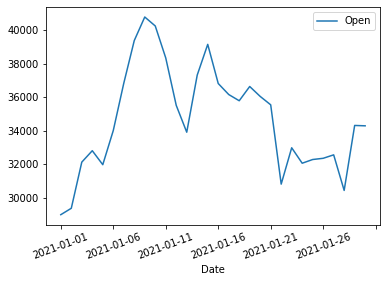

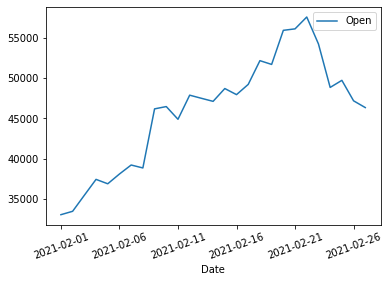

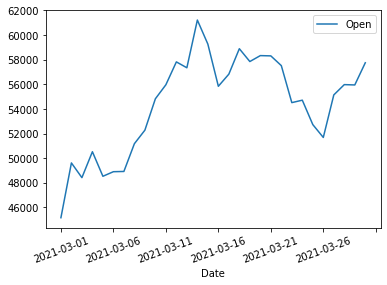

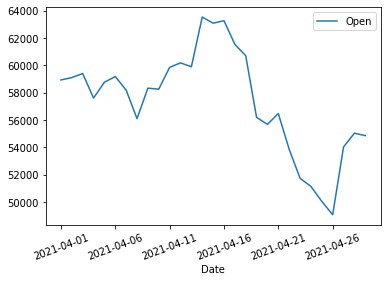

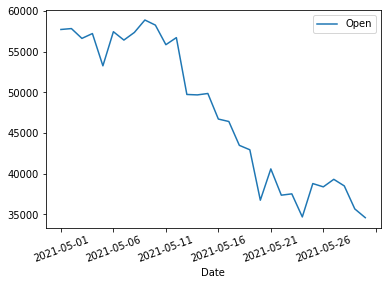

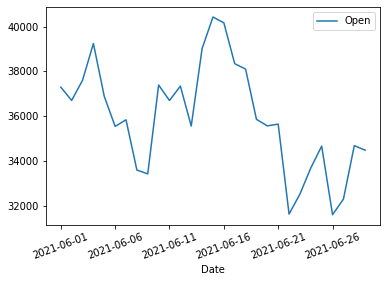

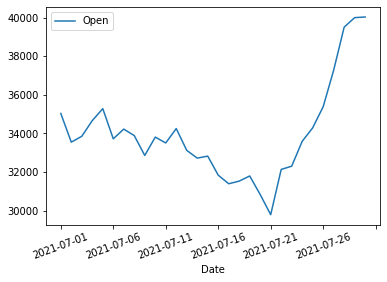

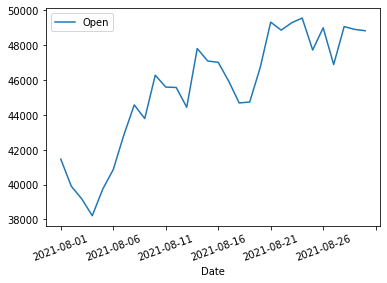

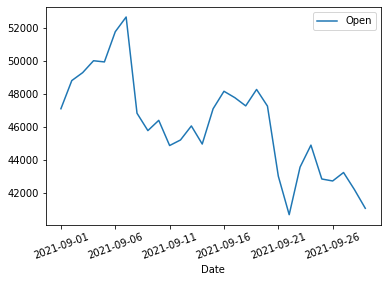

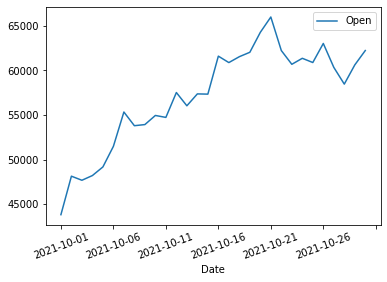

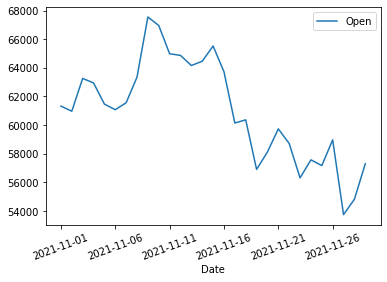

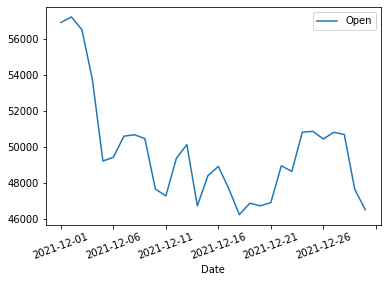

In [ ]:
df2021Jan.plot.line("Date","Open", rot = 20)
df2021Feb.plot.line("Date","Open", rot = 20)
df2021Mar.plot.line("Date","Open", rot = 20)
df2021Apr.plot.line("Date","Open", rot = 20)
df2021May.plot.line("Date","Open", rot = 20)
df2021Jun.plot.line("Date","Open", rot = 20)
df2021Jul.plot.line("Date","Open", rot = 20)
df2021Aug.plot.line("Date","Open", rot = 20)
df2021Sep.plot.line("Date","Open", rot = 20)
df2021Oct.plot.line("Date","Open", rot = 20)
df2021Nov.plot.line("Date","Open", rot = 20)
df2021Dec.plot.line("Date","Open", rot = 20)

In [ ]:
df2021Mar.describe()
print(df2021Mar['Open'])

2357    45159.503906
2358    49612.105469
2359    48415.816406
2360    50522.304688
2361    48527.031250
2362    48899.230469
2363    48918.679688
2364    51174.117188
2365    52272.968750
2366    54824.011719
2367    55963.179688
2368    57821.218750
2369    57343.371094
2370    61221.132813
2371    59267.429688
2372    55840.785156
2373    56825.828125
2374    58893.078125
2375    57850.441406
2376    58332.261719
2377    58309.914063
2378    57517.890625
2379    54511.660156
2380    54710.488281
2381    52726.746094
2382    51683.011719
2383    55137.566406
2384    55974.941406
2385    55947.898438
2386    57750.132813
Name: Open, dtype: float64


NOTE: We just wanted to see if we are dividing the dataframe properly into the correct positions. These values were not particularly used in the tests below.

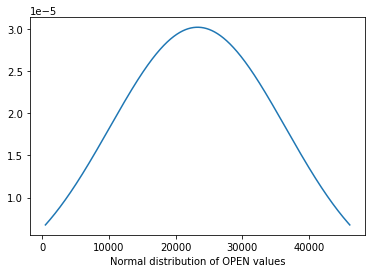

23316.964014005196
13193.110386915178
Mean Volume of Z scores:  0.050245203134255706
Standard Deviation of Z scores:  0.9736215104166064
[-0.33669225  1.31302085  1.06403209 -0.19194289  0.93891953  1.14106845
  0.37432445  0.83296135 -0.05641815 -0.05275053 -1.2171479  -2.499192
 -1.20791161 -0.90353665 -1.50628736 -0.25778965 -0.59599485  0.27067689
  0.61835618  1.20691823  1.39906667  0.03740459  0.14953846 -0.6015184
 -0.37980423  1.50397652  1.57065933  0.34129423  0.59546913 -0.08522087
 -0.50492636 -1.35270675 -1.6078465 ]


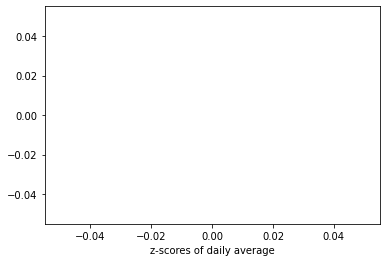


p-value of opening prices of the relationship between February-January:  8.607287570270813e-06

p-value of opening prices of the relationship between March-February:  0.000342144260454294

p-value of opening prices of the relationship between April-March:  0.040143939651260487

p-value of opening prices of the relationship between May-April:  0.0004981174171389313

p-value of opening prices of the relationship between June-May:  0.00010350530256256694

p-value of opening prices of the relationship between July-June:  0.12901459194201398

p-value of opening prices of the relationship between August-July:  3.4093509064928122e-09

p-value of opening prices of the relationship between September-August:  0.1988584231971905

p-value of opening prices of the relationship between October-September:  3.5984562845474164e-06

p-value of opening prices of the relationship between November-October:  0.10371633448796014

p-value of opening prices of the relationship between December-November:  3.95

In [ ]:
sumofjan = df2021Jan.sum()

avgofjan = sumofjan[1] / 31

sumoffeb = df2021Feb.sum()

avgoffeb = sumoffeb[1] / 28

sumofmar = df2021Mar.sum()

avgofmar = sumofmar[1] / 31

sumofapr = df2021Apr.sum()

avgofapr = sumofapr[1] / 30

sumofmay = df2021May.sum()

avgofmay = sumofmay[1] / 31

sumofjun = df2021Jun.sum()

avgofjun = sumofjun[1] / 30

sumofjul = df2021Jul.sum()

avgofjul = sumofjul[1] / 31

sumofaug = df2021Aug.sum()

avgofaug = sumofaug[1] / 31

sumofsep = df2021Sep.sum()

avgofsep = sumofsep[1] / 30

sumofoct = df2021Oct.sum()

avgofoct = sumofoct[1] / 31

sumofnov = df2021Nov.sum()

avgofnov = sumofnov[1] / 30

sumofdec = df2021Dec.sum()

avgofdec = sumofdec[1] / 31

x_axis = np.arange(df['Open'][0], df['Open'][2754], 0.05)
meanOpen = statistics.mean(x_axis)
sdOpen = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, meanOpen, sdOpen))
plt.xlabel("Normal distribution of OPEN values")
plt.show()
print(meanOpen)
print(sdOpen)

#two samplet-test


sampledfJan = df2021Jan.sample(n=15, random_state=15)
sampledfFeb = df2021Feb.sample(n=15, random_state=15)
sampledfMar = df2021Mar.sample(n=15, random_state=15)
sampledfApr = df2021Apr.sample(n=15, random_state=15)
sampledfMay = df2021May.sample(n=15, random_state=15)
sampledfJun = df2021Jun.sample(n=15, random_state=15)
sampledfJul = df2021Jul.sample(n=15, random_state=15)
sampledfAug = df2021Aug.sample(n=15, random_state=15)
sampledfSep = df2021Sep.sample(n=15, random_state=15)
sampledfOct = df2021Oct.sample(n=15, random_state=15)
sampledfNov = df2021Nov.sample(n=15, random_state=15)
sampledfDec = df2021Dec.sample(n=15, random_state=15)


z_list = []
diffFebJan1 = df2021Feb['Open'][2329]-avgofjan
diffFebJan2 = df2021Feb['Open'][2343]-avgofjan
diffFebJan3 = df2021Feb['Open'][2355]-avgofjan
z_list.append(diffFebJan1)
z_list.append(diffFebJan2)
z_list.append(diffFebJan3)
diffMarFeb1 = df2021Mar['Open'][2357]-avgoffeb
diffMarFeb2 = df2021Mar['Open'][2372]-avgoffeb
diffMarFeb3 = df2021Mar['Open'][2386]-avgoffeb
z_list.append(diffMarFeb1)
z_list.append(diffMarFeb2)
z_list.append(diffMarFeb3)
diffAprMar1 = df2021Apr['Open'][2388]-avgofmar
diffAprMar2 = df2021Apr['Open'][2403]-avgofmar
diffAprMar3 = df2021Apr['Open'][2416]-avgofmar
z_list.append(diffAprMar1)
z_list.append(diffAprMar2)
z_list.append(diffAprMar3)
diffMayApr1 = df2021May['Open'][2418]-avgofapr
diffMayApr2 = df2021May['Open'][2433]-avgofapr
diffMayApr3 = df2021May['Open'][2447]-avgofapr
z_list.append(diffMayApr1)
z_list.append(diffMayApr2)
z_list.append(diffMayApr3)
diffJunMay1 = df2021Jun['Open'][2449]-avgofmay
diffJunMay2 = df2021Jun['Open'][2464]-avgofmay
diffJunMay3 = df2021Jun['Open'][2477]-avgofmay
z_list.append(diffJunMay1)
z_list.append(diffJunMay2)
z_list.append(diffJunMay3)
diffJulJun1 = df2021Jul['Open'][2479]-avgofjun
diffJulJun2 = df2021Jul['Open'][2494]-avgofjun
diffJulJun3 = df2021Jul['Open'][2508]-avgofjun
z_list.append(diffJulJun1)
z_list.append(diffJulJun2)
z_list.append(diffJulJun3)
diffAugJul1 = df2021Aug['Open'][2510]-avgofjul
diffAugJul2 = df2021Aug['Open'][2525]-avgofjul
diffAugJul3 = df2021Aug['Open'][2539]-avgofjul
z_list.append(diffAugJul1)
z_list.append(diffAugJul2)
z_list.append(diffAugJul3)
diffSepAug1 = df2021Sep['Open'][2541]-avgofaug
diffSepAug2 = df2021Sep['Open'][2556]-avgofaug
diffSepAug3 = df2021Sep['Open'][2569]-avgofaug
z_list.append(diffSepAug1)
z_list.append(diffSepAug2)
z_list.append(diffSepAug3)
diffOctSep1 = df2021Oct['Open'][2571]-avgofsep
diffOctSep2 = df2021Oct['Open'][2586]-avgofsep
diffOctSep3 = df2021Oct['Open'][2600]-avgofsep
z_list.append(diffOctSep1)
z_list.append(diffOctSep2)
z_list.append(diffOctSep3)
diffNovOct1 = df2021Nov['Open'][2602]-avgofoct
diffNovOct2 = df2021Nov['Open'][2617]-avgofoct
diffNovOct3 = df2021Nov['Open'][2630]-avgofoct
z_list.append(diffNovOct1)
z_list.append(diffNovOct2)
z_list.append(diffNovOct3)
diffDecNov1 = df2021Dec['Open'][2632]-avgofnov
diffDecNov2 = df2021Dec['Open'][2647]-avgofnov
diffDecNov3 = df2021Dec['Open'][2661]-avgofnov
z_list.append(diffDecNov1)
z_list.append(diffDecNov2)
z_list.append(diffDecNov3)
z_list_Axis = np.arange(z_list[0],z_list[32],0.01)

z = stats.zscore(z_list)
x_axisZ = np.arange(z[0], z[32], 0.05)
sumformean = 0
for i in range (32):
  sumformean += z[i]

meanVolumeZ = sumformean/32
print("Mean Volume of Z scores: ", meanVolumeZ)
sumforstd = 0
for i in range(32):
  sumforstd += (z[i] - meanVolumeZ)*(z[i] - meanVolumeZ)


sdVolumeZ = math.sqrt(sumforstd / 32)
print("Standard Deviation of Z scores: ", sdVolumeZ)
print(z)


plt.plot(x_axisZ, norm.pdf(x_axisZ, meanVolumeZ, sdVolumeZ))
plt.xlabel("z-scores of daily average")
plt.show()

t_stat,pvalue1 = stats.ttest_ind(sampledfJan['Open'],sampledfFeb['Open'])
print('\np-value of opening prices of the relationship between February-January: ', pvalue1)

t_stat,pvalue2 = stats.ttest_ind(sampledfFeb['Open'],sampledfMar['Open'])
print('\np-value of opening prices of the relationship between March-February: ', pvalue2)

t_stat,pvalue3 = stats.ttest_ind(sampledfMar['Open'],sampledfApr['Open'])
print('\np-value of opening prices of the relationship between April-March: ', pvalue3)

t_stat,pvalue4 = stats.ttest_ind(sampledfApr['Open'],sampledfMay['Open'])
print('\np-value of opening prices of the relationship between May-April: ', pvalue4)

t_stat,pvalue5 = stats.ttest_ind(sampledfMay['Open'],sampledfJun['Open'])
print('\np-value of opening prices of the relationship between June-May: ', pvalue5)

t_stat,pvalue6 = stats.ttest_ind(sampledfJun['Open'],sampledfJul['Open'])
print('\np-value of opening prices of the relationship between July-June: ', pvalue6)

t_stat,pvalue7 = stats.ttest_ind(sampledfJul['Open'],sampledfAug['Open'])
print('\np-value of opening prices of the relationship between August-July: ', pvalue7)

t_stat,pvalue8 = stats.ttest_ind(sampledfAug['Open'],sampledfSep['Open'])
print('\np-value of opening prices of the relationship between September-August: ', pvalue8)

t_stat,pvalue9 = stats.ttest_ind(sampledfSep['Open'],sampledfOct['Open'])
print('\np-value of opening prices of the relationship between October-September: ', pvalue9)

t_stat,pvalue10 = stats.ttest_ind(sampledfOct['Open'],sampledfNov['Open'])
print('\np-value of opening prices of the relationship between November-October: ', pvalue10)

t_stat,pvalue11 = stats.ttest_ind(sampledfNov['Open'],sampledfDec['Open'])
print('\np-value of opening prices of the relationship between December-November: ', pvalue11)

if pvalue1 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue1 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue2 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue2 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue3 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue3 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue4 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue4 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue5 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue5 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue6 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue6 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue7 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue7 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue8 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue8 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue9 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue9 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue10 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue10 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue11 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue11 >= 0.05:
   print('Fail to reject Null Hypothesis H0')



Since not all the p-values we have found for the corresponding month relationships on opening prices, we cannot side with the null hypothesis since we have evidence that favors the alternative hypothesis. Spesifically, first 5 month relations are giving strong evidence towards alternative hypothesis. After this, p-values fluctuate meaning we fail to reject the null hypothesis for some cases, and for some we reject it.

Note: We wanted to show that we could not graph the z-score table on a normal distribution, that is why unlike aforementioned cases, we have additionally provided the z-score list in the output section of this case. We intentionally kept the blank z-score normal distribution graph to demonstrate that even though we find the z-scores of the values, the graph is not being constructed. We tried, we saw the results and moved on according to this information. In the end, this is what data science is all about.

As the last part of statistical testing and hypothesis testing phase, we will look at the data and investigate it based on a certain month's lowest price values in different years. Since our datapoints start from 2014-September and end on 2022-April we will not be able to properly select a month which includes both these years so we have decided that we will not include 2022 data (only for this evaluation) and go with the selection of the month October. 

In [ ]:
df2014 = df[:106]
df2015 = df[106:471]
df2016 = df[471:837]
df2017 = df[837:1202]
df2018 = df[1202:1567]
df2019 = df[1567:1932]
df2020 = df[1932:2298]
df2021 = df[2298:2663]
oct2014 = df[16:46]
oct2015 = df[381:411]
oct2016 = df[747:777]
oct2017 = df[1112:1142]
oct2018 = df[1477:1507]
oct2019 = df[1842:1872]
oct2020 = df[2208:2238]
oct2021 = df[2573:2603]

Now that we have created the time interval which is the month October of each respective year, we will go ahead and plot the data in order to further investigate and find connections, interesting results. Graphs can be found below.

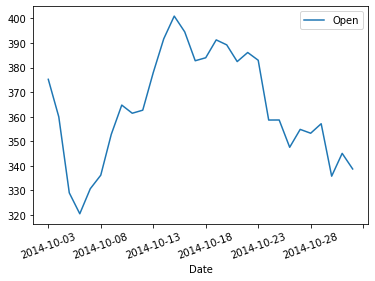

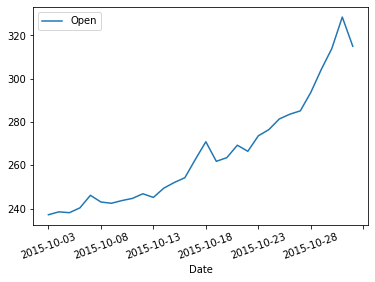

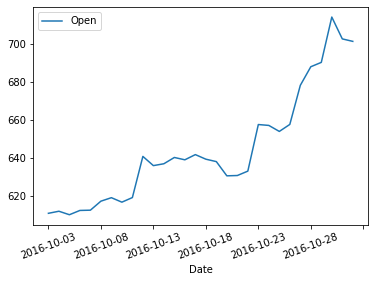

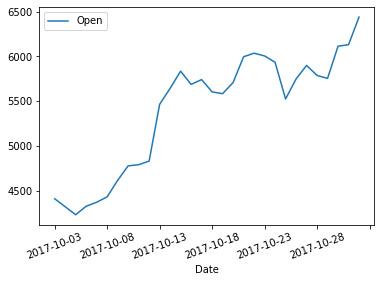

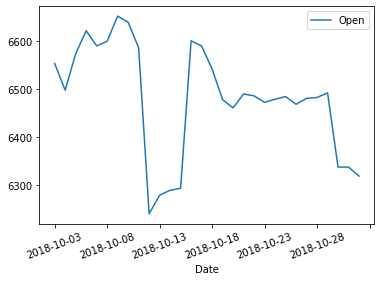

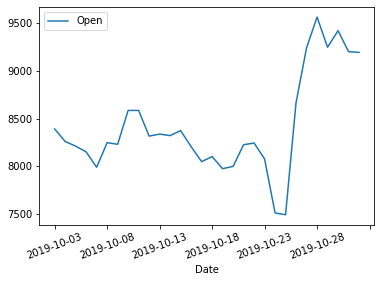

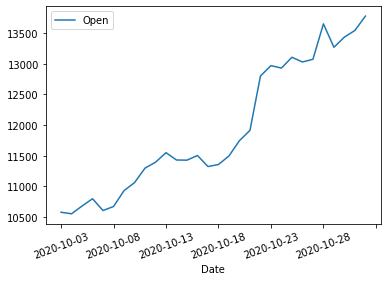

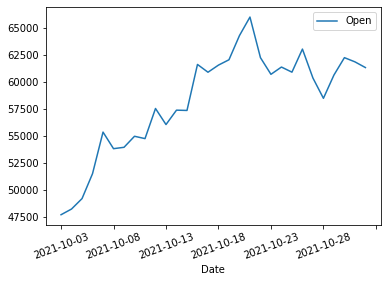

In [ ]:
oct2014.plot.line("Date","Open", rot = 20)
oct2015.plot.line("Date","Open", rot = 20)
oct2016.plot.line("Date","Open", rot = 20)
oct2017.plot.line("Date","Open", rot = 20)
oct2018.plot.line("Date","Open", rot = 20)
oct2019.plot.line("Date","Open", rot = 20)
oct2020.plot.line("Date","Open", rot = 20)
oct2021.plot.line("Date","Open", rot = 20)

As we can se from the graphs, generally, there is not a correlation between the years in total, but we can see some spesific correlation between some years like 2015 and 2016 where the graphs look similar and may suggest that there may be some correlation and connection between them. We can also see that the data of Bitcoin from year 2020 still can resemble the data of 4-5 years ago from years 2015-2016. But apart from that we cannot really see a correlation in the total data. 

We will now create a null hypothesis for this relation. Our null hypothesis will be similar to the previous case: "There is no significant difference between the lowest price values of a certain month in different years". The alternative hypothesis will be "If the difference between z-scores of average lowest price values of two consecutive years is high, then there is a significant differences in values between two years of the same month."



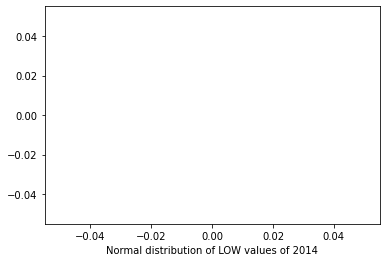

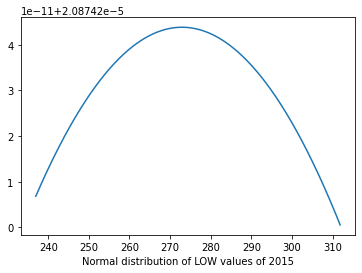

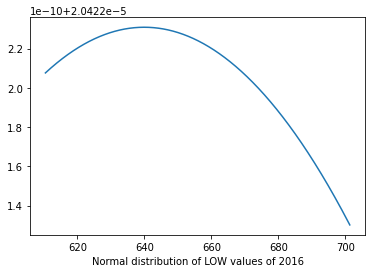

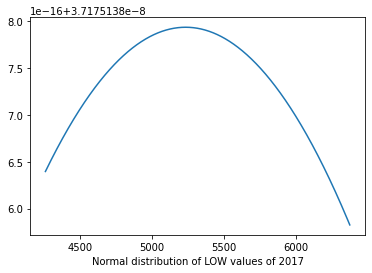

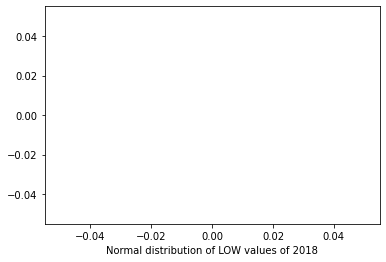

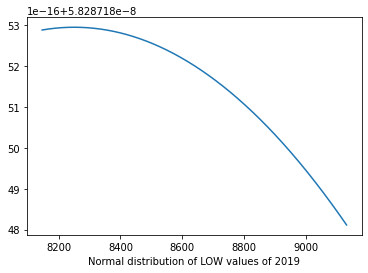

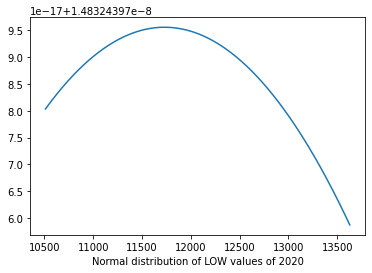

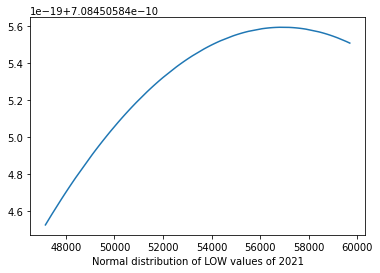

 
Z-score differences of consecutive years:  [ 1.14048513 -0.48258271 -0.59248578 -0.45141533  1.76794523 -0.04635169
 -1.33559485]
Z-scores of the lowest price values in October for each year:  [-0.67849152  1.04868224  0.26368972 -0.69140955 -1.42816155  1.27018796
  1.16038894 -0.94488625]

p-value of the difference between Z-score of 2014 and 2015:  5.996580889328238e-20

p-value of the difference between Z-score of 2015 and 2016:  3.775951301193862e-52

p-value of the difference between Z-score of 2016 and 2017:  1.4507595740230567e-43

p-value of the difference between Z-score of 2017 and 2018:  8.556663802887394e-14

p-value of the difference between Z-score of 2018 and 2019:  6.2701537337338974e-27

p-value of the difference between Z-score of 2019 and 2020:  5.5810444178858824e-24

p-value of the difference between Z-score of 2020 and 2021:  1.7543327586064706e-51
Reject Null Hypothesis H0
Reject Null Hypothesis H0
Reject Null Hypothesis H0
Reject Null Hypothesis H0
Reject Nul

In [ ]:
x_axis2014 = np.arange(oct2014['Low'][16], oct2014['Low'][45], 0.05)

sumformean2014 = 0
for i in range (16,46):
  sumformean2014 += oct2014['Low'][i]
meanVolumeZ2014 = sumformean2014/29

sumforstd2014 = 0
for i in range(16,46):
  sumforstd2014 += (oct2014['Low'][i] - meanVolumeZ2014)*(oct2014['Low'][i] - meanVolumeZ2014)
sdVolumeZ2014 = math.sqrt(sumforstd2014 / 29)


plt.plot(x_axis2014, norm.pdf(x_axis2014, meanVolumeZ2014, sdVolumeZ2014))
plt.xlabel("Normal distribution of LOW values of 2014")
plt.show()


x_axis2015 = np.arange(oct2015['Low'][381], oct2015['Low'][410], 0.05)
 
sumformean2015 = 0
for i in range (381,411):
  sumformean2015 += oct2015['Low'][i]
meanVolumeZ2015 = sumformean2015/29

sumforstd2015 = 0
for i in range(381,411):
  sumforstd2015 += (oct2015['Low'][i] - meanVolumeZ2015)*(oct2015['Low'][i] - meanVolumeZ2015)
sdVolumeZ2015 = math.sqrt(sumforstd2015 / 29)
plt.plot(x_axis2015, norm.pdf(x_axis2015, meanVolumeZ2015, sumforstd2015))
plt.xlabel("Normal distribution of LOW values of 2015")
plt.show()


x_axis2016 = np.arange(oct2016['Low'][747], oct2016['Low'][776], 0.05)


sumformean2016 = 0
for i in range (747,776):
  sumformean2016 += oct2016['Low'][i]
meanVolumeZ2016 = sumformean2016/29

sumforstd2016 = 0
for i in range(747,776):
  sumforstd2016 += (oct2016['Low'][i] - meanVolumeZ2016)*(oct2016['Low'][i] - meanVolumeZ2016)
sdVolumeZ2016 = math.sqrt(sumforstd2016 / 29)
plt.plot(x_axis2016, norm.pdf(x_axis2016, meanVolumeZ2016, sumforstd2016))
plt.xlabel("Normal distribution of LOW values of 2016")
plt.show()


x_axis2017 = np.arange(oct2017['Low'][1112], oct2017['Low'][1141], 0.05)
sumformean2017 = 0
for i in range (1112,1141):
  sumformean2017 += oct2017['Low'][i]
meanVolumeZ2017 = sumformean2017/29

sumforstd2017 = 0
for i in range(1112,1141):
  sumforstd2017 += (oct2017['Low'][i] - meanVolumeZ2017)*(oct2017['Low'][i] - meanVolumeZ2017)
sdVolumeZ2017 = math.sqrt(sumforstd2017 / 29)
plt.plot(x_axis2017, norm.pdf(x_axis2017, meanVolumeZ2017, sumforstd2017))
plt.xlabel("Normal distribution of LOW values of 2017")
plt.show()


x_axis2018 = np.arange(oct2018['Low'][1477], oct2018['Low'][1506], 0.05)
sumformean2018 = 0
for i in range (1477,1506):
  sumformean2018 += oct2018['Low'][i]
meanVolumeZ2018 = sumformean2018/29

sumforstd2018 = 0
for i in range(1477,1506):
  sumforstd2018 += (oct2018['Low'][i] - meanVolumeZ2018)*(oct2018['Low'][i] - meanVolumeZ2018)
sdVolumeZ2018 = math.sqrt(sumforstd2018 / 29)
plt.plot(x_axis2018, norm.pdf(x_axis2018, meanVolumeZ2018, sumforstd2018))
plt.xlabel("Normal distribution of LOW values of 2018")
plt.show()

x_axis2019 = np.arange(oct2019['Low'][1842], oct2019['Low'][1871], 0.05)
sumformean2019 = 0
for i in range (1842,1871):
  sumformean2019 += oct2019['Low'][i]
meanVolumeZ2019 = sumformean2019/29

sumforstd2019 = 0
for i in range(1842,1871):
  sumforstd2019 += (oct2019['Low'][i] - meanVolumeZ2019)*(oct2019['Low'][i] - meanVolumeZ2019)
sdVolumeZ2019 = math.sqrt(sumforstd2019 / 29)
plt.plot(x_axis2019, norm.pdf(x_axis2019, meanVolumeZ2019, sumforstd2019))
plt.xlabel("Normal distribution of LOW values of 2019")
plt.show()

x_axis2020 = np.arange(oct2020['Low'][2208], oct2020['Low'][2237], 0.05)
sumformean2020 = 0
for i in range (2208,2237):
  sumformean2020 += oct2020['Low'][i]
meanVolumeZ2020 = sumformean2020/29

sumforstd2020 = 0
for i in range(2208,2237):
  sumforstd2020 += (oct2020['Low'][i] - meanVolumeZ2020)*(oct2020['Low'][i] - meanVolumeZ2020)
sdVolumeZ2020 = math.sqrt(sumforstd2020 / 29)
plt.plot(x_axis2020, norm.pdf(x_axis2020, meanVolumeZ2020, sumforstd2020))
plt.xlabel("Normal distribution of LOW values of 2020")
plt.show()

x_axis2021 = np.arange(oct2021['Low'][2573], oct2021['Low'][2602], 0.05)
sumformean2021 = 0
for i in range (2573,2602):
  sumformean2021 += oct2021['Low'][i]
meanVolumeZ2021 = sumformean2021/29

sumforstd2021 = 0
for i in range(2573,2602):
  sumforstd2021 += (oct2021['Low'][i] - meanVolumeZ2021)*(oct2021['Low'][i] - meanVolumeZ2021)
sdVolumeZ2021 = math.sqrt(sumforstd2021 / 29)
plt.plot(x_axis2021, norm.pdf(x_axis2021, meanVolumeZ2021, sumforstd2021))
plt.xlabel("Normal distribution of LOW values of 2021")
plt.show()
#two samplet-test
z_list = []
z_year_list = []
z2014 = (meanVolumeZ2014 - oct2014['Low'][30]) / sdVolumeZ2014
z2015 = (meanVolumeZ2015 - oct2015['Low'][395]) / sdVolumeZ2015
z2016 = (meanVolumeZ2016 - oct2016['Low'][761]) / sdVolumeZ2016
z2017 = (meanVolumeZ2017 - oct2017['Low'][1126]) / sdVolumeZ2017
z2018 = (meanVolumeZ2018 - oct2018['Low'][1491]) / sdVolumeZ2018
z2019 = (meanVolumeZ2019 - oct2019['Low'][1856]) / sdVolumeZ2019
z2020 = (meanVolumeZ2020 - oct2020['Low'][2222]) / sdVolumeZ2020
z2021 = (meanVolumeZ2021 - oct2021['Low'][2587]) / sdVolumeZ2021
z_year_list.append(z2014)
z_year_list.append(z2015)
z_year_list.append(z2016)
z_year_list.append(z2017)
z_year_list.append(z2018)
z_year_list.append(z2019)
z_year_list.append(z2020)
z_year_list.append(z2021)
z1415 = z2015-z2014
z1516 = z2016-z2015
z1617 = z2017-z2016
z1718 = z2018-z2017
z1819 = z2019-z2018
z1920 = z2020-z2019
z202a1 = z2021-z2020
z_list.append(z1415)
z_list.append(z1516)
z_list.append(z1617)
z_list.append(z1718)
z_list.append(z1819)
z_list.append(z1920)
z_list.append(z202a1)

ztotal = stats.zscore(z_list)
x_axisZ = np.arange(z_list[0], z_list[6], 0.05)

ztotalyear = stats.zscore(z_year_list)
x_axisZ_year = np.arange(z_year_list[0], z_year_list[7], 0.05)
print (" ")
print("Z-score differences of consecutive years: ", ztotal) 
print("Z-scores of the lowest price values in October for each year: ", ztotalyear) #

sumformeanzlist = 0
for i in range (7):
  sumformeanzlist += z_list[i]
meanVolumezlist = sumformeanzlist/7

sumforstdlist = 0
for i in range(7):
  sumforstdlist += (z_list[i] - meanVolumezlist)*(z_list[i] - meanVolumezlist)
sdVolumeazlist = math.sqrt(sumforstdlist / 7)

sumformeanzyearlist = 0
for i in range (8):
  sumformeanzyearlist += z_year_list[i]
meanVolumeyearzlist = sumformeanzyearlist/8

sumforstdyearlist = 0
for i in range(8):
  sumforstdyearlist += (z_year_list[i] - meanVolumeyearzlist)*(z_year_list[i] - meanVolumeyearzlist)
sdVolumeayearzlist = math.sqrt(sumforstdyearlist / 8)


t_stat,pvalue1 = stats.ttest_ind(oct2014['Low'],oct2015['Low'])
print('\np-value of the difference between Z-score of 2014 and 2015: ', pvalue1)
t_stat,pvalue2 = stats.ttest_ind(oct2015['Low'],oct2016['Low'])
print('\np-value of the difference between Z-score of 2015 and 2016: ', pvalue2)
t_stat,pvalue3 = stats.ttest_ind(oct2016['Low'],oct2017['Low'])
print('\np-value of the difference between Z-score of 2016 and 2017: ', pvalue3)
t_stat,pvalue4 = stats.ttest_ind(oct2017['Low'],oct2018['Low'])
print('\np-value of the difference between Z-score of 2017 and 2018: ', pvalue4)
t_stat,pvalue5 = stats.ttest_ind(oct2018['Low'],oct2019['Low'])
print('\np-value of the difference between Z-score of 2018 and 2019: ', pvalue5)
t_stat,pvalue6 = stats.ttest_ind(oct2019['Low'],oct2020['Low'])
print('\np-value of the difference between Z-score of 2019 and 2020: ', pvalue6)
t_stat,pvalue7 = stats.ttest_ind(oct2020['Low'],oct2021['Low'])
print('\np-value of the difference between Z-score of 2020 and 2021: ', pvalue7)



if pvalue1 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue1 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue2 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue2 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue3 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue3 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue4 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue4 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue5 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue5 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue6 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue6 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

if pvalue7 < .05:
   print('Reject Null Hypothesis H0')
elif pvalue7 >= 0.05:
   print('Fail to reject Null Hypothesis H0')

As we can clearly see all of the p-values we have calculated from the z-scores we have found rejects the null hypothesis we have stated above. So we have enough evidence to believe that when the difference between z-scores of average lowest price values of two consecutive years is high, then there are significant differences in values between two years of the same month.

NOTE: During the analysis of the p-values for each year, we came across blank graphs for years 2014 and 2018. Although the graphs are empty, we have found those year's z-scores and the differences between them and their adjacent next year as accurately as other years which have proper graphs. We could not find the issue regarding the graphs.

###SUMMARY

In conclusion, we have conducted many statistical analyses and hypothesis testing in order to find (if there exists) relations between certain features and how they affect other features' values as well as how in a spesific year months can fluctuate and give different results, or how yearly values of a certain month can shift in 365 days. We have found out that, the volume of transactions in a certain day has an affect on the next day's opening price while the closing price of that day does not affect the opening price as such. When volume and closing prices are put together, due to volume's dominance in p-score values, there seems to be an effect on the opening price of tomorrow. 
As a surprising result, even though it has a lot of similarity and correlation with the high and low price values graphs, we found out that the opening price of a certain day does not seem to have an effect on these spesific values in a day. We have also proved that the daily average of a certain day does affect the same day's High and Low price difference judging by the p-test conducted on the data. We have came to the conclusion that since we managed to reject our null hypothesis for some cases and graphs for the year 2021, we can say that there exists significant levels of difference between the prices of the same year. Although it should be noted that we have found some months that fail to rejet the null hypothesis as well but since finding only one case where we can reject the null hypothesis is enough, we can say there is enough evidence to prove the alternative hypothesis. Lastly, we have found strictly and clearly that there exists significant differences between prices of a certain and different adjacent years which can be derived from their p-value tests.

Machine Learning and the Implementation of Machine Learning Algorithms
- Support Vector Machine Regression
- Simple Linear Regression
- Decision Tree Regression

In [ ]:
#Machine Learning
#We have to get rid of useless columns in our data

df2 = df
df2 = df2.drop(['Date','High','Low','Close','Volume','Adj Close'],axis = 1)#getting rid of useless columns

#We change the name of our Open column as Price to make it more understandable

df2 = df2.rename(columns = {'Open':'Price'}, inplace = False)
predictionDays = 30 #Making sure the predictionDays value is 30 as thats what we were asked for in the project file.
df2['Pred'] = df2[['Price']].shift(-predictionDays)

In [ ]:
df2.tail
#we have NaN values at the end

<bound method NDFrame.tail of              Price   Daily Fluc  Expected Avg  Close Diff    Price Chng  \
0       465.864014    -8.529999    460.298004         0.0 -4.050947e-07   
1       456.859985   -32.419983    434.981994         0.0 -9.401675e-07   
2       424.102997   -29.307007    406.183502         0.0 -7.728702e-07   
3       394.673004    14.230988    406.589493         0.0  3.860444e-07   
4       408.084991    -9.263977    402.803497         0.0 -3.485306e-07   
...            ...          ...           ...         ...           ...   
2750  47100.437500   365.292969  47561.363282         0.0  1.163462e-08   
2751  47456.898438  -394.234375  47200.679688         0.0 -1.343956e-08   
2752  47062.148438 -1523.472657  46451.283204         0.0 -4.571228e-08   
2753  45554.164063   727.480468  45509.691407         0.0  1.906263e-08   
2754  46168.101563   340.000000  46580.705079         0.0  9.593370e-09   

            Pred  
0     382.756012  
1     383.976013  
2     391.25

In [ ]:
X = np.array(df2.drop(['Pred'],1))
X = X[:len(df2)-predictionDays]#we get rid of the NaN data
print(X)

y = np.array(df2['Pred'])

y = y[:-predictionDays]#getting all values except last 30 rows

print(y)

[[ 4.65864014e+02 -8.52999900e+00  4.60298004e+02  0.00000000e+00
  -4.05094744e-07]
 [ 4.56859985e+02 -3.24199830e+01  4.34981994e+02  0.00000000e+00
  -9.40167473e-07]
 [ 4.24102997e+02 -2.93070070e+01  4.06183502e+02  0.00000000e+00
  -7.72870223e-07]
 ...
 [ 4.31945039e+04  1.16013281e+03  4.38730938e+04  0.00000000e+00
   3.57194221e-08]
 [ 4.43576172e+04 -4.33500000e+02  4.42552148e+04  0.00000000e+00
  -1.48544813e-08]
 [ 4.39251953e+04 -1.47340625e+03  4.29681641e+04  0.00000000e+00
  -5.90122989e-08]]
[  382.756012   383.976013   391.253998 ... 47062.148438 45554.164063
 46168.101563]


In [ ]:
# Splitting our dataset into 80% Training and 20% Testing
# Before splitting the data, WE make sure that the dataset is large enough. Train/Test split works well with large datasets.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
predDaysArr = np.array(df2.drop(['Pred'],1))[-predictionDays:]

print(predDaysArr)

[[ 4.24581406e+04 -3.32053516e+03  4.06427305e+04  0.00000000e+00
  -1.16443525e-07]
 [ 3.91484492e+04  2.52136719e+02  3.91716855e+04  0.00000000e+00
   1.48526122e-08]
 [ 3.94041992e+04 -9.84214844e+02  3.89259121e+04  0.00000000e+00
  -4.98457019e-08]
 [ 3.84293047e+04 -3.67265625e+02  3.83452148e+04  0.00000000e+00
  -1.28656827e-08]
 [ 3.80599023e+04  6.77367187e+02  3.86309141e+04  0.00000000e+00
   2.62783929e-08]
 [ 3.87428164e+04  3.24010938e+03  4.05858828e+04  0.00000000e+00
   1.00362323e-07]
 [ 4.19740703e+04 -2.53660938e+03  4.04188340e+04  0.00000000e+00
  -8.16205706e-08]
 [ 3.94399688e+04 -6.44996094e+02  3.92145566e+04  0.00000000e+00
  -2.44642053e-08]
 [ 3.87944648e+04  1.09546875e+02  3.90405664e+04  0.00000000e+00
   7.49476583e-09]
 [ 3.88847266e+04 -1.03506250e+03  3.84687480e+04  0.00000000e+00
  -5.98276248e-08]
 [ 3.78463164e+04  1.82043750e+03  3.87116172e+04  0.00000000e+00
   7.48468709e-08]
 [ 3.96642500e+04 -3.25464844e+02  3.90524199e+04  0.00000000e+00

Support Vector Machine (Regression)
- As the first ML Algorithm, we decided to use SVM(Support Vector Machine Algorithm).

- We decided to use this to predict the discrete values in our data set. The purpose of the regression is to find the best fit line. 
- As SVM is a supervised machine learning algorithm, which can be used for both classification and regression problems.

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [ ]:
#Testing the model
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.27569815933310304


In [ ]:
#Prediction of opening price for a single day given all data of previous 30 days(for all testing data)
svmPrediction = svr_rbf.predict(x_test)

print(svmPrediction)
print()#comparing prediction values with actual ones
print(y_test)

[  694.56486598 10512.94771665   218.62869797 13845.64817148
  7736.85499315   417.68723658 11430.99982128   245.76394284
 12503.36457876 13754.91364799  9563.73607259   329.27396132
   223.75394643 13959.27613187  2643.12377008  8768.75403725
  2404.83410813  7076.12362086 14604.75142179   281.70632223
 10401.61090952  4146.54867159   290.75729082 13661.13494198
 12475.84745885  9265.13414509  8957.48859455 13754.91364799
   390.68898841  8861.2943525   9191.35864737  7553.35820255
   647.32472098 14476.94669749  9177.70356216 11515.70661387
  9335.67857685   417.68884007 14246.86743413 10913.50514787
  8074.8996935    435.88104504  8978.46175553  7820.33495924
 13772.50654938  7979.65108052 13754.91364799  8774.92050762
  1296.20681528   259.90327062 13755.09928593  4128.32997447
   415.60187325  9668.43061613 11946.93000523 13887.4653611
   656.28835413  6545.94054713  8420.96949688 10660.72503427
  4559.10037914   625.32198042  7577.97274457 13896.23565299
 10477.29399085  5882.431

Predict trends of all features 
- Open, High, Low, Close, Volume for the future time span.
- 09 March 2022 - 09 September 2022


In [ ]:
print(df.tail) #dataframe ends at 2nd of April,we'll predict the price from this point until 09 September 2022

<bound method NDFrame.tail of             Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2750  2022-03-29  47100.437500  48022.289063  47100.437500  47465.730469   
2751  2022-03-30  47456.898438  47655.148438  46746.210938  47062.664063   
2752  2022-03-31  47062.148438  47512.027344  45390.539063  45538.675781   
2753  2022-04-01  45554.164063  46616.242188  44403.140625  46281.644531   
2754  2022-04-02  46168.101563  47003.429688  46157.980469  46508.101563   

         Adj Close       Volume   Daily Fluc  Expected Av

In [ ]:
#160 days between 02 April and 09 September hence we will take the value as 160 to make sure we include all the date in the given interval

futurePredictions = np.array(df2.drop(['Pred'],1))[-160:]
svm_prediction = svr_rbf.predict(futurePredictions)

print(svm_prediction)#predictions for the next 160 days
print()
print(df2.tail(160))#print the actual price for last 160 days

[14758.12792981 13754.91539266 14754.91365746 14756.0081875
 14755.77750461 14795.03461116 15314.23773081 14949.25484646
 14207.95492537 14755.48034669 13761.62148247 14856.17373596
 14948.15628497 14757.26522844 13754.91364799 13754.91364799
 14754.91364799 14754.91513562 13754.91434223 14755.27915425
 14755.3225742  14754.91364799 14754.91364799 14845.48843015
 14754.9136618  14770.0427541  14773.05057214 13755.15366177
 13756.17139954 14973.93121625 15622.60583951 14811.4793381
 14754.91364799 15737.21853973 14758.76297926 14854.87557002
 14767.23158606 14201.24554805 13903.80104042 14924.54845771
 14754.91364799 14447.9622518  13759.69385316 15252.36684044
 13771.87750656 14975.96354074 14755.38660622 15008.64658964
 14697.84809898 14761.0675834  14989.52191273 14519.73420236
 13762.01309315 14899.75319232 13938.44795252 14770.82439199
 14982.62834287 15453.43468823 15939.93907251 13801.44438871
 15256.25231934 14779.56656027 14769.16186647 14693.41629117
 14974.43620087 15035.3330

In [ ]:
# we should do this for all data values(close, low, etc. to make sure we do not miss any data hence predict every value in a correct way)

#HIGH PREDICTIONS ( high price )
df2 = df2.rename(columns = {'Price':'High'})
df2['High'] = df['High']
df2['Pred'] = df2[['High']].shift(-predictionDays)

X = np.array(df2.drop(['Pred'],1))
X = X[:len(df)-predictionDays] 

y = np.array(df2['Pred'])
y = y[:-predictionDays]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) # test data, train data etc

prediction_days_array = np.array(df2.drop(['Pred'], 1))[-predictionDays:]

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

svr_rbf_confidence = svr_rbf.score(x_test, y_test) #confidence

print("svr_rbf accuracy: ", svr_rbf_confidence)

futurePredictions = np.array(df2.drop(['Pred'],1))[-160:]
svm_prediction = svr_rbf.predict(futurePredictions)

print(svm_prediction) #predictions for the next 160 days
print()
print(df2.tail(160)) #printing the actual price for last 160 days
# After checking both of these values, we will be able to compare the predicted values with the actual values and hence can confirm whether our "accuracy is actually correct or at least close to being correct"


svr_rbf accuracy:  0.3171558112216475
[15502.32217042 15465.54311744 15479.95040863 15465.51950117
 15466.06380559 14695.21927894 16083.1596055  15923.75857492
 14525.49352379 15465.82683626 15565.98862478 14596.82156123
 15941.38396309 15502.85340124 15465.51826714 15465.51826714
 14465.51826714 15465.53624921 15465.62330509 15465.56171505
 15465.55613165 15465.51826714 15465.53594588 15716.36413266
 15465.92063987 15756.16704556 14501.98983851 14466.01153114
 15465.51826759 15527.13880968 16182.80328551 14731.28103932
 15465.51826714 17098.91995492 15466.3512462  16883.92296729
 15798.67242004 16545.47387744 15481.40549043 15466.49346997
 15465.51826714 16181.46777657 15567.29328152 15493.7137963
 14572.41733818 15836.00391298 14532.48172331 15567.69276667
 15521.19332704 15467.34202875 15521.68193019 16686.12656926
 15471.70702643 15741.63957483 16555.75939577 16990.68225058
 15721.12303563 15565.99374714 16228.81554212 15571.8809732
 16036.51362114 15467.07487298 15672.99003838 160

In [ ]:
# we should do this for all data values(close, low etc.)

#LOW PREDICTIONS
df2 = df2.drop(columns = ['High','Pred'])
df2['Low'] = df['Low']
df2['Pred'] = df2[['Low']].shift(-predictionDays)

X = np.array(df2.drop(['Pred'],1))
X = X[:len(df)-predictionDays]

y = np.array(df2['Pred'])
y = y[:-predictionDays]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

prediction_days_array = np.array(df2.drop(['Pred'], 1))[-predictionDays:]

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

svr_rbf_confidence = svr_rbf.score(x_test, y_test)

print("svr_rbf accuracy: ", svr_rbf_confidence)

futurePredictions = np.array(df2.drop(['Pred'],1))[-160:]
svm_prediction = svr_rbf.predict(futurePredictions)

print(svm_prediction)#predictions for the next 160 days
print()
print(df2.tail(160))#print the actual price for last 160 days
# After checking both of these values, we will be able to compare the predicted values with the actual values and hence can confirm whether our "accuracy is actually correct or at least close to being correct"


svr_rbf accuracy:  0.32758621689548795
[15547.90773586 15075.65903702 15075.65223943 15076.96333308
 15076.1280076  15982.12587523 15280.50417027 15198.65011014
 15546.92989643 15082.13511161 15109.26247815 15985.10942847
 15359.2257963  15078.07696062 15075.64275296 15075.64275296
 15075.64523281 15075.64358696 14075.64275456 15075.91309596
 15075.97114533 15075.64523281 15075.64276783 15095.86388985
 15075.64275616 16148.29068765 14076.96465734 15075.65047166
 15245.1631345  15955.38985124 15655.34980807 15187.73485404
 15075.64279964 16217.53391809 15075.64337444 15831.5448654
 15146.7516746  15064.915917   15148.81929084 14075.64326976
 15075.64275466 15219.80786759 14361.53416652 15345.01985558
 15253.24684222 14436.54250709 15086.32668272 15539.53315608
 14734.72227694 15075.67517006 16052.7088653  15894.64195468
 15082.33537769 15103.52073421 15199.81698996 16012.54580004
 15470.98142273 15930.13471843 15523.29115578 15080.1159435
 15337.85321911 15098.74497872 15112.79542469 14

In [ ]:
#we should do this for all data values(close, low etc.)

#CLOSE PREDICTIONS
df2 = df2.drop(columns = ['Low','Pred'])
df2['Close'] = df['Close']
df2['Pred'] = df2[['Close']].shift(-predictionDays)

X = np.array(df2.drop(['Pred'],1))
X = X[:len(df)-predictionDays]

y = np.array(df2['Pred'])
y = y[:-predictionDays]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

prediction_days_array = np.array(df2.drop(['Pred'], 1))[-predictionDays:]

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

svr_rbf_confidence = svr_rbf.score(x_test, y_test)

print("svr_rbf accuracy: ", svr_rbf_confidence)

futurePredictions = np.array(df2.drop(['Pred'],1))[-160:]
svm_prediction = svr_rbf.predict(futurePredictions)

print(svm_prediction)#predictions for the next 160 days
print()
print(df2.tail(160))#print the actual price for last 160 days
# After checking both of these values, we will be able to compare the predicted values with the actual values and hence can confirm whether our "accuracy is actually correct or at least close to being correct"


svr_rbf accuracy:  0.2642106694285651
[14728.29431742 14646.89151955 14646.93459957 14646.89108615
 13646.89431634 14656.46692229 15001.37614908 15038.80711458
 14056.84366886 14647.56924062 14222.20974757 14748.2720212
 15090.33051869 14728.29463854 13646.89108615 13646.89108615
 13646.89108615 14646.8916184  13646.8911523  13646.97416976
 14646.89531419 13646.89108615 13647.02329774 14810.62634976
 13646.89113337 14670.82586299 14646.89108711 14647.12688625
 14648.4834872  14210.49514042 15376.12730851 14779.5239884
 13646.89108615 15390.64180442 14649.23700264 14886.17047844
 13695.93284422 15486.55377439 14881.36048001 14713.63243218
 14646.89108615 14185.60309746 14647.46976887 14676.79437738
 13658.83867582 14997.6557944  14649.11149259 14748.94655813
 15589.33865517 14646.89111568 15454.10373499 15503.23417928
 14659.51714868 14855.30297215 14987.34047573 15566.38656999
 14946.28719402 14457.34128952 15403.67795013 14650.59485475
 15153.64994309 14672.14152895 14648.06387957 151

In [ ]:
#we should do this for all data values(close, low etc.)

#ADJ CLOSE PREDICTIONS
df2 = df2.drop(columns = ['Close','Pred'])
df2['Adj Close'] = df['Adj Close']
df2['Pred'] = df2[['Adj Close']].shift(-predictionDays)

X = np.array(df2.drop(['Pred'],1))
X = X[:len(df)-predictionDays]

y = np.array(df2['Pred'])
y = y[:-predictionDays]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

prediction_days_array = np.array(df2.drop(['Pred'], 1))[-predictionDays:]

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

svr_rbf_confidence = svr_rbf.score(x_test, y_test)

print("svr_rbf accuracy: ", svr_rbf_confidence)

futurePredictions = np.array(df2.drop(['Pred'],1))[-160:]
svm_prediction = svr_rbf.predict(futurePredictions)

print(svm_prediction)#predictions for the next 160 days
print()
print(df2.tail(160))#print the actual price for last 160 days
# After checking both of these values, we will be able to compare the predicted values with the actual values and hence can confirm whether our "accuracy is actually correct or at least close to being correct"


svr_rbf accuracy:  0.32197425029255156
[15333.68723753 14918.6980794  14918.58853409 14918.56768625
 14918.56909861 13925.33002614 15206.57727943 15295.39069783
 15328.51845113 14919.24398127 14490.93135071 14017.13508604
 15431.47185835 15076.20549329 14918.5658678  14918.5658678
 14918.5658678  13918.64944257 14918.57323794 14918.57321521
 14918.56591005 14918.5658678  14918.69807939 15082.32884745
 14918.56591502 14964.88239942 14918.80524011 13918.79795792
 14020.91745405 15482.16982645 14158.77922866 15051.2012487
 13918.5658678  15157.00569795 14920.91178432 15188.39711192
 14967.50866541 15758.23064607 14939.04414483 13985.30721383
 14918.5658678  15484.29423244 14919.29459511 14948.46917934
 13930.5134567  15269.34513134 14919.07322481 15123.03130724
 15879.36098253 14930.55311641 15747.10266205 15102.2456589
 14931.0879789  15117.82936555 15259.03269645 15907.66946361
 15225.3167917  15480.66161881 15928.61232043 14936.92610427
 15425.32697386 14943.8163106  14919.73866122 154

Applying the Simple Linear Regression

In [ ]:
#Appyling Simple Linear Regression
# We decided to use Simple Linear Regression to show how strong the relationship is between variables. 
# Comparing the data with each other such as open/close/high etc. 
# We were able to get an Accuracy Score of the algorithm and compare the predicted and current values and at the end,
# compared the accuracy scores of all algorithms with each other.

df2 = df
df2 = df2.drop(['Date','High','Low','Close','Volume','Adj Close'],axis = 1)#getting rid of useless columns
df2 = df2.rename(columns = {'Open':'Price'}, inplace = False)
predictionDays = 30
df2['Pred'] = df2[['Price']].shift(-predictionDays)

X = np.array(df2.drop(['Pred'],1))
X = X[:len(df2)-predictionDays] #we get rid of the NaN data , basically bettering our Data 

y = np.array(df2['Pred'])

y = y[:-predictionDays] #getting all values except last 30 rows 

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

prediction_days_array = np.array(df2.drop(['Pred'], 1))[-predictionDays:]

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [ ]:
#testing our model
reg_confidence = reg.score(x_test,y_test)
print(reg_confidence)

0.9163411953033677


In [ ]:
reg.coef_

array([ 2.05191067e+00,  1.50165612e+00, -1.07371243e+00,  0.00000000e+00,
       -3.56899802e+06])

In [ ]:
#printing the predicted values
reg_predict = reg.predict(x_test)
print(reg_predict)

[  984.28918967  1282.33452685  1203.3932885   6661.79787943
  3461.2032674   8674.61074705 12155.65596452 11316.61625149
  2319.04501907  3196.77601559 11412.23491601  7536.91474973
 10951.24788243  7342.54162811 58367.35398723 43336.51246152
 10864.19556735  8480.89318425  1395.95604204  4878.68438638
 46803.36061705 16527.72809509 39809.36324352  7842.83445451
  1326.11758929 42986.80425906  1363.5213785   2967.07366827
 52233.19975215 10272.64111214  6632.02418243  1288.4610435
  6815.58975105  8414.57387227   961.3450769  10116.01431013
 62758.23975025  8829.02995019  1706.74960885  5781.19522133
   942.52084175  1320.25354076  1386.55899904 58423.28744355
  6967.23066893  4663.72108982  7166.29406347 17527.47569744
  4996.81149899  1555.0771286  18891.2571067  58236.14476421
 12268.89604754 14378.23169677  9125.27523885  9786.01988321
 11148.00796576   949.7780813  57433.55994411 57732.74154234
  4627.50067751 57985.44778383  1234.91049086 10667.9470983
  5530.03358717  1393.6377

In [ ]:
#model predictions for next 30 days (as written in the projects file)
reg_prediction = reg.predict(prediction_days_array)

#predictions for the next 30 days
print(reg_prediction)

print()

#print the actual price of bitcoin for last 30 days, Hence we can see how well our algorithm did
print(df2.tail(predictionDays))
# After checking both of these values, we will be able to compare the predicted values with the actual values and hence can confirm whether our "accuracy is actually correct or at least close to being correct"


[39131.11838665 39283.86248299 38216.18464573 37765.60361468
 38269.40375357 41419.70125302 39555.31245064 38488.95863343
 38484.20776496 37564.81582612 39460.81773312 39603.03921283
 40853.36922646 40772.56888701 41646.61398688 41936.21651982
 41100.43557607 40928.26936973 41709.62591156 42847.04022435
 43617.68731186 43801.23963254 44136.18297228 46436.46097034
 46287.6177245  46762.46410782 46740.70117163 45039.73335415
 46336.40929729 45864.36489277]

             Price   Daily Fluc  Expected Avg  Close Diff    Price Chng  Pred
2725  42458.140625 -3320.535156  40642.730468         0.0 -1.164435e-07   NaN
2726  39148.449219   252.136719  39171.685547         0.0  1.485261e-08   NaN
2727  39404.199219  -984.214844  38925.912110         0.0 -4.984570e-08   NaN
2728  38429.304688  -367.265625  38345.214844         0.0 -1.286568e-08   NaN
2729  38059.902344   677.367187  38630.914062         0.0  2.627839e-08   NaN
2730  38742.816406  3240.109375  40585.882812         0.0  1.003623e-07 

Decision Tree Regression

In [ ]:
#applying decision tree regression
# We decided to use Decision Tree Regression as one of our Machine Learning Techniques
# As our data is full of continuous variables, we thought implementing it to our data would be a good idea as this is a case of regression.
# We also wanted to evaluate its performance over other traditional models.
# Decision Tree builds regression models in the form of a tree structure.
# We used this to break down our datasets into smaller and smaller subsets which would help us a lot with comparing the values and predicting values.
# With Decision Tree Regression, we aim to observe the features of our data and train a model in our structure to predict data for the future Bitcoin prices.

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)


DecisionTreeRegressor()

In [ ]:
#testing our model
dtr_conf = dtr.score(x_test,y_test)
print(dtr_conf)

0.9012801969512529


In [ ]:
dtr_predict = dtr.predict(x_test)
print(dtr_predict)

[  463.552002   569.830017   623.424011  6879.44043   2525.25
  9565.101563 10280.998047 10821.632813  2709.429932  2757.5
 11495.038086  7263.        8585.262695  9734.291016 55681.792969
 38742.816406 13550.451172  8370.049805   803.737     7087.529785
 42840.890625 11256.       38886.828125  6084.399902   780.070007
 63032.761719   908.354004  2607.25     34700.363281  9126.09082
  6600.189941   657.012024  4269.004395  6754.640137   455.846985
  6206.521484 56509.164063  7561.79541   1723.119995  6379.666992
   200.050003   655.099976   679.809021 53736.429688  6478.069824
  5350.914551  6486.049805 18806.765625  4408.459961  1273.209961
 23781.974609 57214.179688 10677.754883  8616.129883 13017.125
 14036.599609 13654.214844   462.234009 47653.730469 47623.871094
  3469.091797 46707.0625     689.124023  9729.321289  7203.507324
  1014.23999    409.265015   239.934006  4389.209961   432.571014
 11778.581055 14681.900391  2191.560059   416.571991   442.966003
  1273.209961  1317.839

In [ ]:
#adding the next 30 days
dtr_prediction = dtr.predict(prediction_days_array)
print(dtr_prediction)
print() #comparing predictions and actual prices of the last 30 days
print(df2.tail(predictionDays))
# After checking both of these values, we will be able to compare the predicted values with the actual values and hence can confirm whether our "accuracy is actually correct or at least close to being correct"



[40118.101563 44505.355469 39250.191406 33682.800781 51174.117188
 44505.355469 40118.101563 39250.191406 44505.355469 48807.847656
 47491.203125 39250.191406 31594.664063 44096.703125 38429.304688
 43854.652344 48834.851563 44096.703125 38742.816406 37846.316406
 51769.003906 45554.164063 45554.164063 47273.527344 40427.167969
 38151.917969 59267.429688 47098.       46396.664063 55963.179688]

             Price   Daily Fluc  Expected Avg  Close Diff    Price Chng  Pred
2725  42458.140625 -3320.535156  40642.730468         0.0 -1.164435e-07   NaN
2726  39148.449219   252.136719  39171.685547         0.0  1.485261e-08   NaN
2727  39404.199219  -984.214844  38925.912110         0.0 -4.984570e-08   NaN
2728  38429.304688  -367.265625  38345.214844         0.0 -1.286568e-08   NaN
2729  38059.902344   677.367187  38630.914062         0.0  2.627839e-08   NaN
2730  38742.816406  3240.109375  40585.882812         0.0  1.003623e-07   NaN
2731  41974.070313 -2536.609375  40418.833985         0.

Creating a Simple Recommendation System to Decide whether to Buy Bitcoin 
given the open and close prices, as well as volume, of previous 30 days.

In [ ]:
#First, we implement the accuracy scores of all the models we used above
#After doing that, we are going to be 
#accuracy scores of all models

#accuracy score of SVR
print("Accuracy score of SVR : ",svr_rbf_confidence)

#accuracy score of simple linear regression
print("Accuracy score of simple linear regression : ",reg_confidence)

#accuracy score of decision tree regression
print("Accuracy score of decision tree regression : ",dtr_conf)

Accuracy score of SVR :  0.32197425029255156
Accuracy score of simple linear regression :  0.9163411953033677
Accuracy score of decision tree regression :  0.9012801969512529


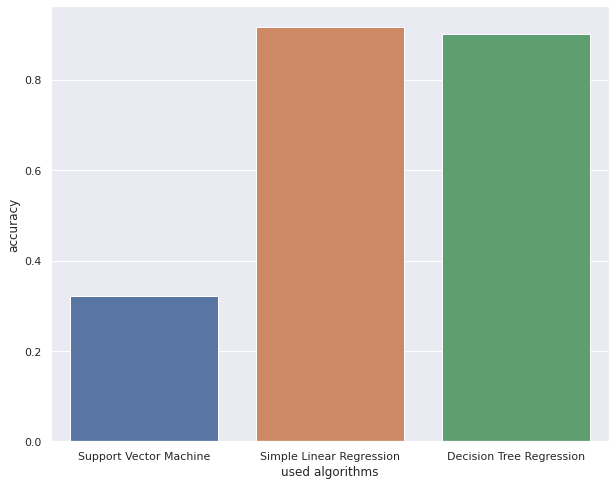

In [ ]:
#accuracy visualization
#Visualizing the scores to make it easier for people to understand and choose the right one, 
# in case they do want to use our Bitcoin Price Prediction Algorithm and buy at their own risks
# based on our Algorithms and Accuracy Score results. (Not a Financial Advice)(DYOR)

scores = [svr_rbf_confidence, reg_confidence, dtr_conf]
algorithms = ["Support Vector Machine", "Simple Linear Regression", "Decision Tree Regression"]
sns.set(rc={'figure.figsize':(10,8)})
plt.xlabel("used algorithms")
plt.ylabel("accuracy")
sns.barplot(algorithms, scores)



As the Accuracy Score of Simple Linear Regression Algorithm is the closest to 1, we prefer people to buy Bitcoin based on the accuracy of that Machine Learning algorithm. But keep in mind, these are based on the data we gathered, tests/hypothesis we conducted and the algorithms we implemented.
We are not here to give financial advice but to help people see which Algorithm gives the best result when it comes to predicting future Bitcoin Price. 